#LOADING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

#LOADING DATA

In [ ]:
data=pd.read_csv('/content/Insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#UNDERSTATNDING THE DATA

To get to know about the dataset:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.shape

(1338, 7)

Finding out unique values for required column:<br>
The object columns -> Sex, Smoker and Region:

In [ ]:
l1 = data.iloc[:,[1,4,5]]
for col_name in l1.columns:  # Iterate over column names instead of the DataFrame itself
  print(data[col_name].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].value_counts())

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
sex
male      676
female    662
Name: count, dtype: int64
bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
charges
1639.56310     2
16884.92400    1
29330.98315   

#DATA PREPROCESSING


Checking for null values:

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
data.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Dummy variables encoding:

In [ ]:
X = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)
X.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


Changing the type of dummy variables by splitting the dataset:

In [ ]:
X1 = X.iloc[:,[-5,-4,-3,-2,-1]]
X1 = X1.astype('int')
X1.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [ ]:
X2 = X.iloc[:,[0,1,2,3]]
X2.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


Joining the dataset back in required format:

In [ ]:
x = X2.join(X1)
x.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


Checking the structue of the new data frame:

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   int64  
 5   smoker_yes        1338 non-null   int64  
 6   region_northwest  1338 non-null   int64  
 7   region_southeast  1338 non-null   int64  
 8   region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


#EXPLORATORY DATA ANALYSIS

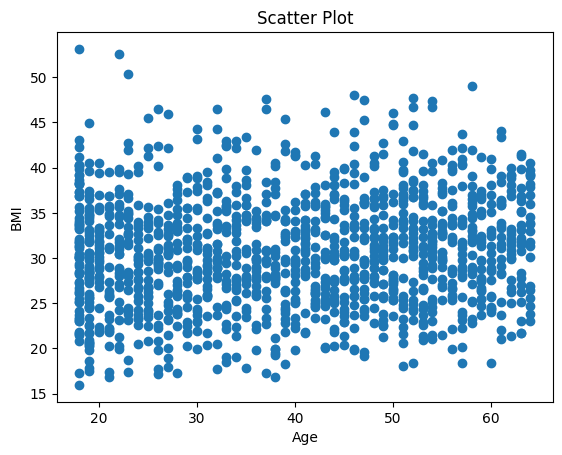

In [ ]:
# Creating a basic scatter plot for Age and BMI:
plt.scatter(x.iloc[:,0], x.iloc[:,1])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Scatter Plot')
plt.show()

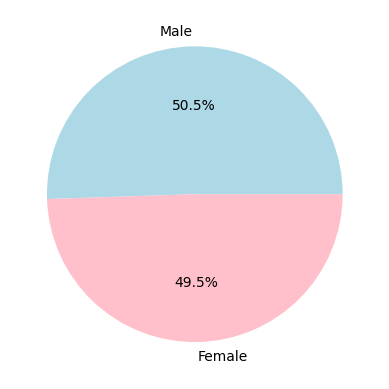

In [ ]:
#Creating Pie shart to get sex ratio:
plt.pie(x.iloc[:,4].value_counts(), labels=['Male','Female'], autopct='%1.1f%%', colors=['lightblue','pink'])
plt.show()

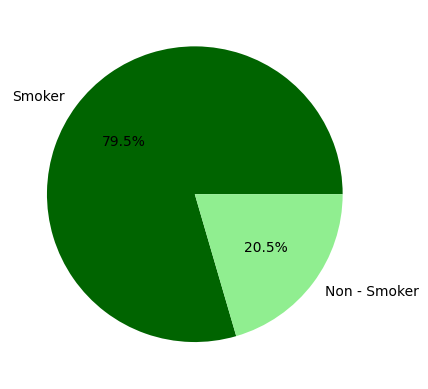

In [ ]:
#Creating Pie shart to get smoker status:
plt.pie(x.iloc[:,5].value_counts(), labels=['Smoker','Non - Smoker'], autopct='%1.1f%%',colors=['darkgreen','lightgreen'])
plt.show()

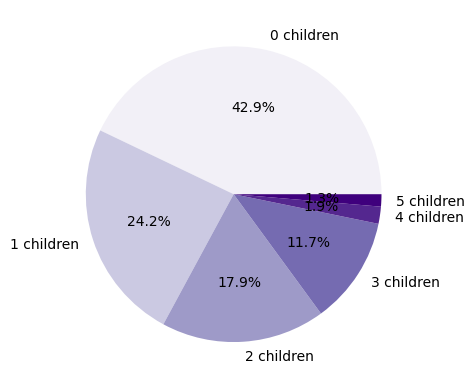

In [ ]:
#Creating Pie shart to get children status:
plt.pie(x.iloc[:,2].value_counts(), labels=['0 children','1 children','2 children','3 children','4 children','5 children'], autopct='%1.1f%%',colors=['#f2f0f7','#cbc9e2','#9e9ac8','#756bb1','#54278f','#3f007d'])
plt.show()

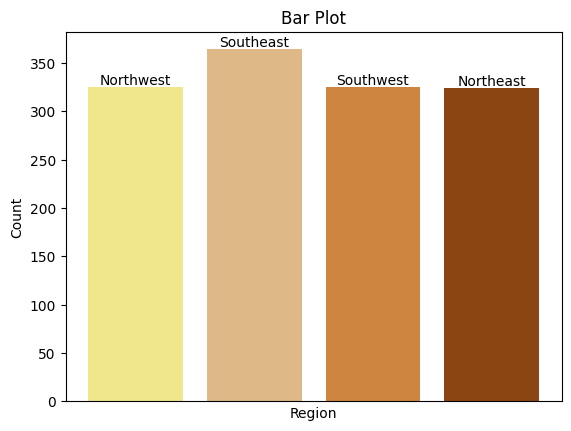

In [ ]:
#Creating Bar plot for region wise data
#Extracting data region wise:
region_northwest = x[x['region_northwest'] == 1]
region_southeast = x[x['region_southeast'] == 1]
region_southwest = x[x['region_southwest'] == 1]
region_northeast =  x[(x['region_northwest'] == 0) & (x['region_southeast'] == 0) & (x['region_southwest'] == 0)]

bar_container=plt.bar(['region_northwest','region_southeast','region_southwest','region_northeast'],[len(region_northwest),len(region_southeast),len(region_southwest),len(region_northeast)],color=['khaki','burlywood','peru','saddlebrown'])
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Bar Plot')
plt.bar_label(bar_container, labels=['Northwest','Southeast','Southwest','Northeast'])
plt.xticks([])
plt.show()

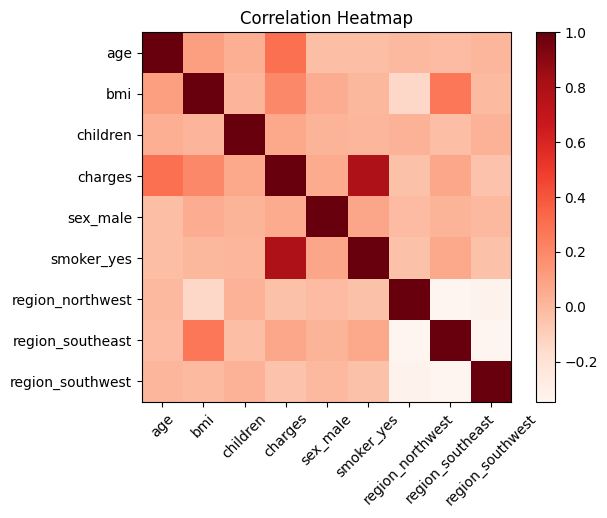

In [ ]:
# Extract data for heatmap
heatmap_data = x[['age', 'bmi', 'children', 'charges','sex_male','smoker_yes','region_northwest','region_southeast','region_southwest']].corr()

# Create a heatmap
plt.imshow(heatmap_data, cmap='Reds', interpolation='nearest')
plt.colorbar()

# Customize the plot
plt.xticks(range(len(heatmap_data)), heatmap_data.columns, rotation=45)
plt.yticks(range(len(heatmap_data)), heatmap_data.columns)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


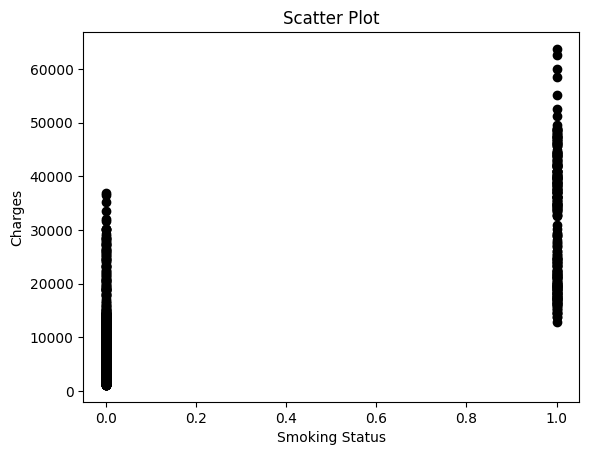

In [ ]:
# Creating a scatter plot of Smoking status and charges:
plt.scatter(x.iloc[:,5], x.iloc[:,3],color=['black'])
plt.xlabel('Smoking Status')
plt.ylabel('Charges')
plt.title('Scatter Plot')
plt.show()

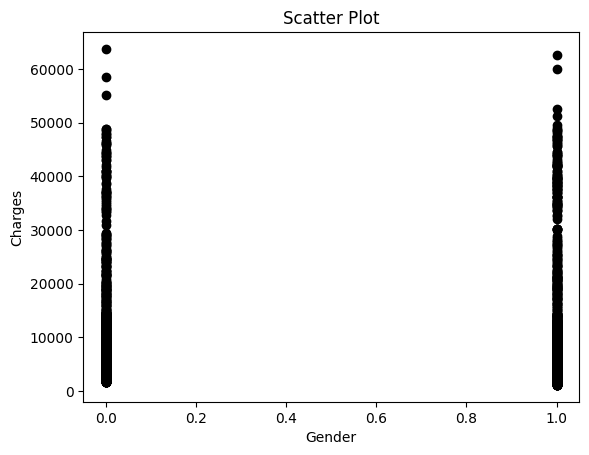

In [ ]:
# Creating a scatter of charges for each gender
plt.scatter(x.iloc[:,4], x.iloc[:,3],color=['black'])
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Scatter Plot')
plt.show()

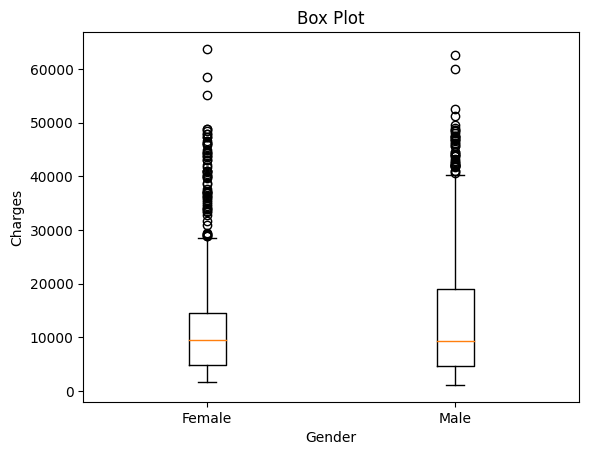

In [ ]:
# Creating a boxplot of charges for each gender
plt.boxplot([x.iloc[:,3][x.iloc[:,4] == 0], x.iloc[:,3][x.iloc[:,4] == 1]], labels=['Female', 'Male']) # Create separate boxplots for charges where gender is 0 (Female) and 1 (Male)
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Box Plot')
plt.show()

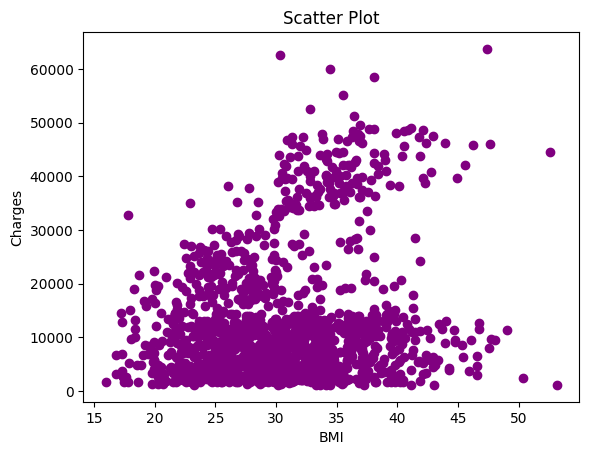

In [ ]:
# Creating a scatter plot of Age and charges:
plt.scatter(x.iloc[:,1], x.iloc[:,3],color=['purple'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Scatter Plot')
plt.show()

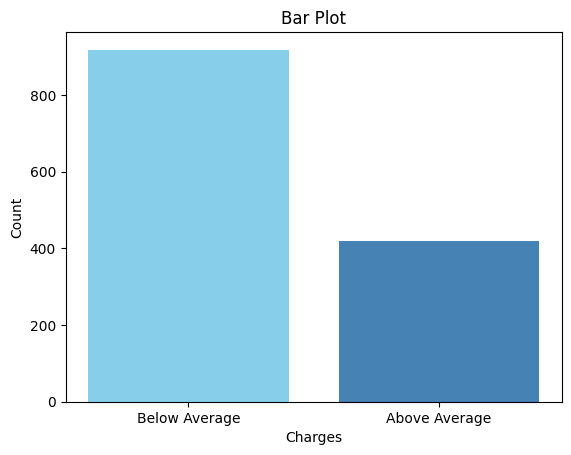

In [ ]:
#Creating bar plot of below and above average charges:
average_charges = x['charges'].mean()
below_average_charges = x[x['charges'] < average_charges]
above_average_charges = x[x['charges'] >= average_charges]
plt.bar(['Below Average', 'Above Average'], [len(below_average_charges), len(above_average_charges)],color=['skyblue','steelblue'])
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Bar Plot')
plt.show()

#MACHINE LEARNING ALGORITHMS

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


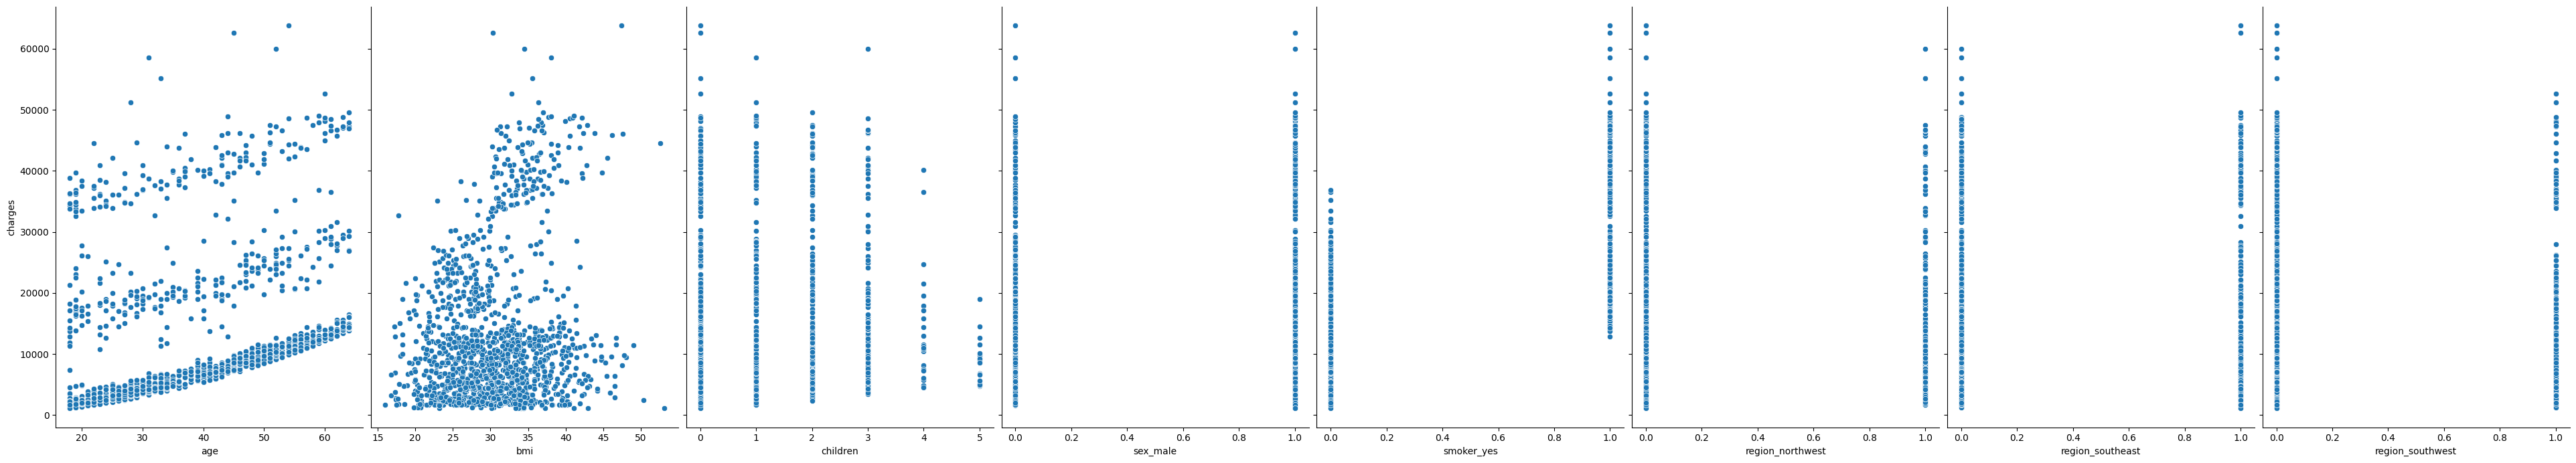

In [ ]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(x, x_vars=['age','bmi','children','sex_male','smoker_yes','region_northwest','region_southeast','region_southwest'], y_vars='charges', size=7, aspect=0.7)

#Multicoliniarity Check

In [ ]:
# create X and y

X = x.drop('charges', axis=1)
y = x["charges"]

# Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i).round(1) for i in range(X.shape[1])]

    return(vif)

calc_vif(X_train)

,variables,VIF
0,age,7.6
1,bmi,11.4
2,children,1.8
3,sex_male,1.9
4,smoker_yes,1.3
5,region_northwest,1.9
6,region_southeast,2.3
7,region_southwest,2.0


Here, the BMI is giving value greater than 10, depicting multicollinearity. Hence we will move on removing BMI variable.

In [ ]:
calc_vif(X_train.drop('bmi', axis=1))

,variables,VIF
0,age,3.8
1,children,1.8
2,sex_male,1.8
3,smoker_yes,1.2
4,region_northwest,1.7
5,region_southeast,1.8
6,region_southwest,1.7


Now, we see that all the variables are below 10 which shows no multicollienarity.

#Significance Test (Using p - values)

In [ ]:
X_train_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_constant).fit()

# Print the summary to get p-values
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     371.7
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          1.85e-301
Time:                        12:32:18   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1061   BIC:                         2.177e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.183e+04   1127.759  

In [ ]:
X_train_nomulti = X_train.drop(['bmi'], axis=1)

In [ ]:
X_train_constant_1 = sm.add_constant(X_train_nomulti)
model2 = sm.OLS(y_train, X_train_constant_1).fit()

# Print the summary to get p-values
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     371.6
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          2.42e-280
Time:                        12:32:18   Log-Likelihood:                -10904.
No. Observations:                1070   AIC:                         2.182e+04
Df Residuals:                    1062   BIC:                         2.186e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2696.2870    745.394  

 Here we see that removing BMI has dropped the R - squared value from 0.737 to 0.710 and the adjusted R squared value has dropped from 0.735 to 0.708

In [ ]:
X_train_nomulti_1 = X_train_nomulti.drop(['sex_male'], axis=1)

In [ ]:
X_train_constant_2 = sm.add_constant(X_train_nomulti_1)
model3 = sm.OLS(y_train, X_train_constant_2).fit()

# Print the summary to get p-values
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     433.9
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          1.15e-281
Time:                        12:32:18   Log-Likelihood:                -10904.
No. Observations:                1070   AIC:                         2.182e+04
Df Residuals:                    1063   BIC:                         2.186e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2645.7811    719.053  

R squared  and adjuested R squared values remains the same (No BMI and gender status)

In [ ]:
X_train_nomulti_2 = X_train_nomulti.drop(['sex_male','region_northwest'], axis=1)
X_train_constant_3 = sm.add_constant(X_train_nomulti_2)
model4 = sm.OLS(y_train, X_train_constant_3).fit()

# Print the summary to get p-values
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     521.0
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          5.65e-283
Time:                        12:32:18   Log-Likelihood:                -10904.
No. Observations:                1070   AIC:                         2.182e+04
Df Residuals:                    1064   BIC:                         2.185e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2821.7687    649.459  

R squared value remains the same but the adjusted R squared value improves from 0.708 to 0.709 (No BMI, gender status and Northwest region)

In [ ]:
X_train_nomulti_3 = X_train_nomulti.drop(['sex_male','region_northwest','region_southwest'], axis=1)
X_train_constant_4 = sm.add_constant(X_train_nomulti_3)
model5 = sm.OLS(y_train, X_train_constant_4).fit()

# Print the summary to get p-values
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     651.7
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          2.25e-284
Time:                        12:32:18   Log-Likelihood:                -10904.
No. Observations:                1070   AIC:                         2.182e+04
Df Residuals:                    1065   BIC:                         2.184e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2891.9296    625.319  

R squared and adjuested R squared values remains the same (No BMI, gender status, northwest and southwest region)

In [ ]:
X_train_nomulti_4 = X_train_nomulti.drop(['sex_male','region_northwest','region_southwest','region_southeast'], axis=1)
X_train_constant_5 = sm.add_constant(X_train_nomulti_4)
model6 = sm.OLS(y_train, X_train_constant_5).fit()

# Print the summary to get p-values
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     866.1
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          3.43e-285
Time:                        12:32:18   Log-Likelihood:                -10905.
No. Observations:                1070   AIC:                         2.182e+04
Df Residuals:                    1066   BIC:                         2.184e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2678.3764    614.334     -4.360      0.0

R squared and the adjusted R squared values have dropped a little from 0.710 to 0.709 and from 0.709 to 0.708 respectively (No BMI, gender status, northwest, southwest and southeast directions (Region variable removed))

Checking the VIF and significance after removing the insignificant variables and including the multicollinear variable:

In [ ]:
#Calculating the VIF by dropping only the insignificant variables and including the multicollinearity variable:

calc_vif(X_train.drop(['sex_male','region_northwest','region_southeast','region_southwest'], axis=1))

,variables,VIF
0,age,7.5
1,bmi,7.9
2,children,1.8
3,smoker_yes,1.2


Here, we notice that the varibles are giving values below 10.

In [ ]:
X_train_nomulti_5 = X_train.drop(['sex_male','region_northwest','region_southwest','region_southeast'], axis=1)
X_train_constant_6 = sm.add_constant(X_train_nomulti_5)
model7 = sm.OLS(y_train, X_train_constant_6).fit()

# Print the summary to get p-values
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     742.8
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          3.00e-306
Time:                        12:32:18   Log-Likelihood:                -10853.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1065   BIC:                         2.174e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.191e+04   1059.711    -11.239      0.0

Here, we see that compared to the original data set, the R squared value has dropped from 0.737 to 0.736 and the adjusted R squared value remains the same that is 0.735. All the variables here are having p - vlaue above 0.05 which is showing significance.

#LINEAR REGRESSION

In [ ]:
# create X and y
feature = ['age','bmi','children','sex_male','smoker_yes','region_northwest','region_southeast','region_southwest']
X_1 = x[feature]
y_1 = x.charges

# instantiate and fit
lm1 = LinearRegression()
lm1.fit(X_1, y_1)

# print the coefficients
print(lm1.intercept_)
print(lm1.coef_)

-11938.538576167146
[  256.85635254   339.19345361   475.50054515  -131.3143594
 23848.53454191  -352.96389942 -1035.02204939  -960.0509913 ]


In [ ]:
# pair the feature names with the coefficients
{i:j for i,j in zip(feature, lm1.coef_)}

{'age': 256.85635253734864,
 'bmi': 339.1934536108373,
 'children': 475.5005451491264,
 'sex_male': -131.31435939511314,
 'smoker_yes': 23848.534541912835,
 'region_northwest': -352.96389942465464,
 'region_southeast': -1035.022049387825,
 'region_southwest': -960.0509913008366}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, random_state=1)
lm = LinearRegression()
lm.fit(X_train, y_train)
LM_y_pred = lm.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, LM_y_pred)))

5982.5670650360735


In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    Lm_X_train, Lm_X_test, Lm_y_train, Lm_y_test = train_test_split(X_1, y_1, test_size=ratio, random_state=1)
    LM1 = LinearRegression()
    LM1.fit(Lm_X_train, Lm_y_train)
    Lm_y_pred = LM1.predict(Lm_X_test)
    rmse = np.sqrt(metrics.mean_squared_error(Lm_y_test, Lm_y_pred))
    R2 = r2_score(Lm_y_test, Lm_y_pred)
    print(f"Split Ratio: {ratio}, RMSE: {rmse}, R Score : {R2}")


Split Ratio: 0.1, RMSE: 6565.384612114565, R Score : 0.7272291228241008
Split Ratio: 0.2, RMSE: 5956.454717976427, R Score : 0.7623311844057112
Split Ratio: 0.3, RMSE: 6063.122656850449, R Score : 0.7405989316927213
Split Ratio: 0.4, RMSE: 6135.876953164414, R Score : 0.7380715985194329


In [ ]:
#Model after removing Multicolinearity:
# create X and y
features = ['age','children','sex_male','smoker_yes','region_northwest','region_southeast','region_southwest']
X_2 = x[features]
y_2 = x.charges

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X_2, y_2)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

-2790.027141745599
[  273.33209253   496.46313449    53.81273621 23775.53261727
  -345.63754047   389.16915013  -484.19736784]


In [ ]:
# pair the feature names with the coefficients
{i:j for i,j in zip(features, lm2.coef_)}

{'age': 273.3320925319249,
 'children': 496.46313448674846,
 'sex_male': 53.81273621241377,
 'smoker_yes': 23775.532617272547,
 'region_northwest': -345.63754046902795,
 'region_southeast': 389.1691501318909,
 'region_southwest': -484.1973678417488}

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_2, y_2, random_state=1)
Lm2 = LinearRegression()
Lm2.fit(X_train_1, y_train_1)
LM_y_pred_1 = Lm2.predict(X_test_1)
print(np.sqrt(metrics.mean_squared_error(y_test_1, LM_y_pred_1)))

6373.6018391985035


In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    Lm_X_train_1, Lm_X_test_1, Lm_y_train_1, Lm_y_test_1 = train_test_split(X_2, y_2, test_size=ratio, random_state=1)
    LM2 = LinearRegression()
    LM2.fit(Lm_X_train_1, Lm_y_train_1)
    Lm_y_pred_1 = LM2.predict(Lm_X_test_1)
    Lm_rmse = np.sqrt(metrics.mean_squared_error(Lm_y_test_1, Lm_y_pred_1))
    Lm_R2 = r2_score(Lm_y_test_1, Lm_y_pred_1)
    print(f"Split Ratio: {ratio}, RMSE: {Lm_rmse}, R Score: {Lm_R2}")

Split Ratio: 0.1, RMSE: 7004.282205467186, R Score: 0.6895405199581226
Split Ratio: 0.2, RMSE: 6383.516366472451, R Score: 0.7270290286306532
Split Ratio: 0.3, RMSE: 6443.536614539605, R Score: 0.7070269626863981
Split Ratio: 0.4, RMSE: 6524.696786794768, R Score: 0.70382392253444


In [ ]:
#Model after removing Insignificant Variables:
# create X and y
features_1 = ['age','bmi','children','smoker_yes']
X_3 = x[features_1]
y_3 = x.charges

# instantiate and fit
lm3 = LinearRegression()
lm3.fit(X_3, y_3)

# print the coefficients
print(lm3.intercept_)
print(lm3.coef_)

-12102.7693627279
[  257.84950728   321.85140247   473.50231561 23811.3998446 ]


In [ ]:
# pair the feature names with the coefficients
{i:j for i,j in zip(features_1, lm3.coef_)}

{'age': 257.8495072765737,
 'bmi': 321.8514024653413,
 'children': 473.5023156137562,
 'smoker_yes': 23811.39984460182}

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_3, y_3, random_state=1)
Lm3 = LinearRegression()
Lm3.fit(X_train_2, y_train_2)
LM_y_pred_2 = Lm3.predict(X_test_2)
print(np.sqrt(metrics.mean_squared_error(y_test_2, LM_y_pred_2)))

6005.93071184933


In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    Lm_X_train_2, Lm_X_test_2, Lm_y_train_2, Lm_y_test_2 = train_test_split(X_3, y_3, test_size=ratio, random_state=1)
    LM3 = LinearRegression()
    LM3.fit(Lm_X_train_2, Lm_y_train_2)
    Lm_y_pred_2 = LM3.predict(Lm_X_test_2)
    Lm_rmse_1 = np.sqrt(metrics.mean_squared_error(Lm_y_test_2, Lm_y_pred_2))
    Lm_R2_1 = r2_score(Lm_y_test_2, Lm_y_pred_2)
    print(f"Split Ratio: {ratio}, RMSE: {Lm_rmse_1}, R Score: {Lm_R2_1}")


Split Ratio: 0.1, RMSE: 6588.750552324302, R Score: 0.7252841066567355
Split Ratio: 0.2, RMSE: 5970.7635379973135, R Score: 0.76118793890636
Split Ratio: 0.3, RMSE: 6079.476069454566, R Score: 0.7391977350447327
Split Ratio: 0.4, RMSE: 6130.194769833569, R Score: 0.7385564961370813


In [ ]:
#Model after removing Multicollinearity and then Insignificant Variables:
# create X and y
features_2 = ['age','children','smoker_yes']
X_4 = x[features_2]
y_4 = x.charges

# instantiate and fit
lm4 = LinearRegression()
lm4.fit(X_4, y_4)

# print the coefficients
print(lm4.intercept_)
print(lm4.coef_)

-2851.985844259234
[  273.08876197   486.65236912 23842.602064  ]


In [ ]:
# pair the feature names with the coefficients
{i:j for i,j in zip(features_2, lm4.coef_)}

{'age': 273.0887619678993,
 'children': 486.6523691241723,
 'smoker_yes': 23842.602064003335}

In [ ]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_4, y_4, random_state=1)
Lm4 = LinearRegression()
Lm4.fit(X_train_3, y_train_3)
LM_y_pred_3 = Lm4.predict(X_test_3)
print(np.sqrt(metrics.mean_squared_error(y_test_3, LM_y_pred_3)))

6385.053837911417


In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    Lm_X_train_3, Lm_X_test_3, Lm_y_train_3, Lm_y_test_3 = train_test_split(X_4, y_4, test_size=ratio, random_state=1)
    LM4 = LinearRegression()
    LM4.fit(Lm_X_train_3, Lm_y_train_3)
    Lm_y_pred_3 = LM4.predict(Lm_X_test_3)
    Lm_rmse_2 = np.sqrt(metrics.mean_squared_error(Lm_y_test_3, Lm_y_pred_3))
    Lm_R2_2 = r2_score(Lm_y_test_3, Lm_y_pred_3)
    print(f"Split Ratio: {ratio}, RMSE: {Lm_rmse_2}, R Score: {Lm_R2_2}")


Split Ratio: 0.1, RMSE: 7024.0148601883875, R Score: 0.6877887860961924
Split Ratio: 0.2, RMSE: 6400.027901075181, R Score: 0.7256150747912916
Split Ratio: 0.3, RMSE: 6455.409934829013, R Score: 0.7059462618724248
Split Ratio: 0.4, RMSE: 6514.23932843633, R Score: 0.7047725541842884


In [ ]:
# prompt: r square of the model

# R-squared of model 1
print(f"Model 1(training set): {(lm.score(X_train, y_train))}")
print(f"Model 1: {(lm.score(X_test, y_test))}")

# R-squared of model 2
print(f"Model 2(training set): {(lm2.score(X_train_1, y_train_1))}")
print(f"Model 2: {(lm2.score(X_test_1, y_test_1))}")

# R-squared of model 3
print(f"Model 3(training set): {(lm3.score(X_train_2, y_train_2))}")
print(f"Model 3: {(lm3.score(X_test_2, y_test_2))}")

# R-squared of model 4
print(f"Model 4(training set): {(lm4.score(X_train_3, y_train_3))}")
print(f"Model 4: {(lm4.score(X_test_3, y_test_3))}")



Model 1(training set): 0.7553135420543625
Model 1: 0.7339256331232802
Model 2(training set): 0.7312676115152368
Model 2: 0.7015297713112802
Model 3(training set): 0.7541629707601885
Model 3: 0.7342572368441755
Model 4(training set): 0.730818074519192
Model 4: 0.6995275114756494


In [ ]:
# prompt: adjusted r square

# Adjusted R-squared of model 1
print(f"Model 1: {(1 - (1-lm.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))}")

# Adjusted R-squared of model 2
print(f"Model 2: {(1 - (1-lm2.score(X_test_1, y_test_1))*(len(y_test_1)-1)/(len(y_test_1)-X_test_1.shape[1]-1))}")

# Adjusted R-squared of model 3
print(f"Model 3: {(1 - (1-lm3.score(X_test_2, y_test_2))*(len(y_test_2)-1)/(len(y_test_2)-X_test_2.shape[1]-1))}")

# Adjusted R-squared of model 4
print(f"Model 4: {(1 - (1-lm4.score(X_test_3, y_test_3))*(len(y_test_3)-1)/(len(y_test_3)-X_test_3.shape[1]-1))}")


Model 1: 0.7273962008072871
Model 2: 0.6951405003607571
Model 3: 0.7310361124422867
Model 4: 0.6968041958696884


#KNN ALGORITHM

In [ ]:
KNN_model=KNeighborsRegressor(n_neighbors=5)

In [ ]:
KNN_model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
KNN_y_pred = KNN_model.predict(X_test)

In [ ]:
KNN_y_pred

array([15156.85964  , 18192.71901  ,  9134.22192  , 20422.064668 ,
        4921.11803  , 21110.20065  , 12899.704722 , 14610.84098  ,
        6123.67562  ,  8260.90652  , 18282.674486 , 21414.624642 ,
       13324.41081  ,  7052.57442  ,  3348.59957  , 12664.60863  ,
        7087.627102 ,  9390.89367  , 14256.47299  , 19929.52616  ,
       16422.02406  , 14646.960684 , 12133.41331  , 12598.010172 ,
        6847.7330338,  6619.29417  , 15867.571668 , 15388.93878  ,
        6838.146094 ,  3823.70073  , 13665.119422 , 10955.58986  ,
       16897.74048  , 15424.187706 , 17891.23815  , 19428.691792 ,
       31942.651644 , 10057.42127  , 13399.448678 , 25581.588528 ,
       10005.126852 , 11983.0098   , 10505.44012  , 21049.676    ,
       10115.164202 , 12752.05873  ,  1493.93174  , 15675.30043  ,
        9090.84772  , 16109.62994  , 28940.837676 , 17779.72195  ,
        7034.659608 ,  8827.49297  ,  6638.432198 ,  5913.833034 ,
        8050.35638  , 17832.697746 ,  9060.315316 , 16702.8806

In [ ]:
knn = pd.DataFrame({'Predicted':KNN_y_pred,'Actual':y_test})
knn

,Predicted,Actual
559,15156.859640,1646.42970
1087,18192.719010,11353.22760
1020,9134.221920,8798.59300
460,20422.064668,10381.47870
802,4921.118030,2103.08000
...,...,...
1192,12195.102240,13019.16105
628,13554.630800,11365.95200
1098,13513.176664,23045.56616
1038,2309.642870,2250.83520


In [ ]:
r2_score(y_test,KNN_y_pred)

0.1525119628149023

In [ ]:
metrics.mean_absolute_error(y_test,KNN_y_pred)

7569.346139616717

In [ ]:
KNN_mse = mean_squared_error(y_test, KNN_y_pred)
KNN_rmse = np.sqrt(KNN_mse)
KNN_rmse

10677.088570322978

In [ ]:
KNN_mape = mean_absolute_percentage_error(y_test, KNN_y_pred)
print(KNN_mape)
KNN_mape = KNN_mape * 100
KNN_mape

0.9946705646094205


99.46705646094205

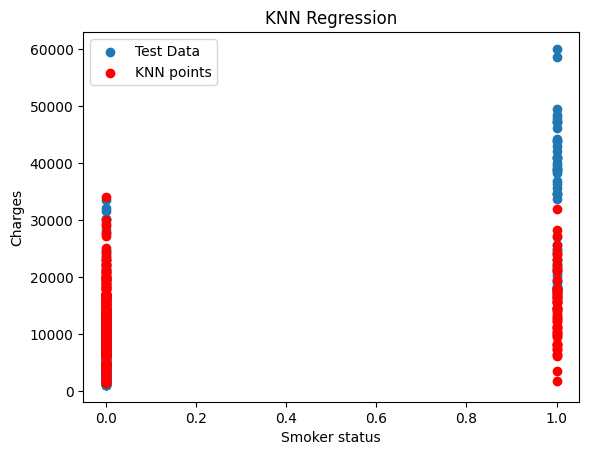

In [ ]:
plt.scatter(X_test['smoker_yes'], y_test, label='Test Data')
plt.scatter(X_test['smoker_yes'], KNN_y_pred, color='red', linewidth=1, label='KNN points')
plt.xlabel('Smoker status')
plt.ylabel('Charges')
plt.title('KNN Regression')
plt.legend()
plt.show()

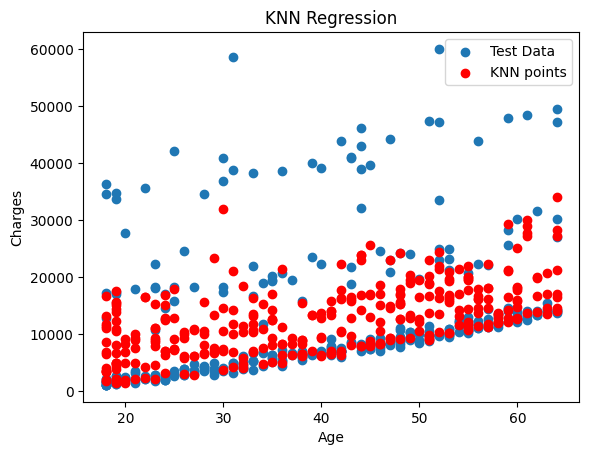

In [ ]:
plt.scatter(X_test['age'], y_test, label='Test Data')
plt.scatter(X_test['age'], KNN_y_pred, color='red', linewidth=1, label='KNN points')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('KNN Regression')
plt.legend()
plt.show()

In [ ]:
# try different values of n_neighbors
for i in range(1, 50):
  Knn_model = KNeighborsRegressor(n_neighbors=i)
  Knn_model.fit(X_train, y_train)
  Knn_y_pred = Knn_model.predict(X_test)
  print(f"n_neighbors = {i}, R^2 score: {r2_score(y_test, Knn_y_pred)}")


n_neighbors = 1, R^2 score: -0.5292927084594565
n_neighbors = 2, R^2 score: -0.04493687178096328
n_neighbors = 3, R^2 score: 0.10696172769329693
n_neighbors = 4, R^2 score: 0.1064600621737678
n_neighbors = 5, R^2 score: 0.1525119628149023
n_neighbors = 6, R^2 score: 0.14304292705479538
n_neighbors = 7, R^2 score: 0.15756127576172918
n_neighbors = 8, R^2 score: 0.16877137022666377
n_neighbors = 9, R^2 score: 0.17944754440291766
n_neighbors = 10, R^2 score: 0.19037622511420482
n_neighbors = 11, R^2 score: 0.19478236154586603
n_neighbors = 12, R^2 score: 0.18412092255608625
n_neighbors = 13, R^2 score: 0.16661262061619142
n_neighbors = 14, R^2 score: 0.15349363378088854
n_neighbors = 15, R^2 score: 0.14911959663557717
n_neighbors = 16, R^2 score: 0.14819915536423311
n_neighbors = 17, R^2 score: 0.14496632499271223
n_neighbors = 18, R^2 score: 0.13980223968689387
n_neighbors = 19, R^2 score: 0.14870276889288514
n_neighbors = 20, R^2 score: 0.15125636160849065
n_neighbors = 21, R^2 score: 0

In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    Knn_X_train, Knn_X_test, Knn_y_train, Knn_y_test = train_test_split(X_1, y_1, test_size=ratio, random_state=1)
    KNN = KNeighborsRegressor(n_neighbors=5)
    KNN.fit(Knn_X_train, Knn_y_train)
    Knn_y_pred = KNN.predict(Knn_X_test)
    Knn_rmse = np.sqrt(metrics.mean_squared_error(Knn_y_test, Knn_y_pred))
    Knn_R2 = r2_score(Knn_y_test, Knn_y_pred)
    print(f"Split Ratio: {ratio}, RMSE: {Knn_rmse}, R Score: {Knn_R2}")


Split Ratio: 0.1, RMSE: 12167.606628899475, R Score: 0.06311135352583308
Split Ratio: 0.2, RMSE: 11130.460425849844, R Score: 0.17010571756030213
Split Ratio: 0.3, RMSE: 11037.968808585956, R Score: 0.14027931286970075
Split Ratio: 0.4, RMSE: 11582.532748924066, R Score: 0.06666751372539925


KNN Model after removing Multicolinearity:

In [ ]:
KNN_model_1=KNeighborsRegressor(n_neighbors=5)

In [ ]:
KNN_model_1.fit(X_train_1, y_train_1)

KNeighborsRegressor()

In [ ]:
KNN_y_pred_1 = KNN_model_1.predict(X_test_1)
KNN_y_pred_1

array([ 1827.2401  , 11552.16355 ,  9027.50496 , 10371.4835  ,
        2130.842   , 17121.86214 , 12536.582688, 11405.251   ,
        2860.72786 , 25144.35266 , 19269.62627 , 15069.575272,
        6805.25077 ,  6783.90809 ,  1141.01698 , 11577.70759 ,
        5932.77949 , 10020.615262, 22018.268618, 13184.4682  ,
        9583.33401 ,  7552.30341 , 17797.28247 ,  8821.92796 ,
        2204.1321  ,  6811.35116 , 15056.33889 , 17373.88554 ,
        5699.81382 ,  6151.81697 , 16515.186694, 11442.66403 ,
       23956.465584, 25083.586546,  9988.13296 , 15927.127052,
       19162.43095 , 10738.01995 , 14247.336298, 19746.79429 ,
       11224.241746, 12011.95443 , 10534.70886 , 13950.61896 ,
       11630.82216 , 12849.22414 ,  4977.6234  , 17040.48247 ,
        9212.84843 , 12919.23801 , 22041.204702, 16266.689944,
        2721.28906 ,  8952.02966 , 17710.906018,  4043.34476 ,
       29026.31159 , 12891.16009 , 20253.65443 ,  1141.01698 ,
        5813.2327  , 13207.63202 , 32418.477   ,  6534.

In [ ]:
knn_1 = pd.DataFrame({'Predicted':KNN_y_pred_1,'Actual':y_test_1})
knn_1

,Predicted,Actual
559,1827.240100,1646.42970
1087,11552.163550,11353.22760
1020,9027.504960,8798.59300
460,10371.483500,10381.47870
802,2130.842000,2103.08000
...,...,...
1192,14533.064028,13019.16105
628,11488.603990,11365.95200
1098,13474.575066,23045.56616
1038,2151.349800,2250.83520


In [ ]:
r2_score(y_test_1,KNN_y_pred_1)

0.3713402972125063

In [ ]:
metrics.mean_absolute_error(y_test_1,KNN_y_pred_1)

5326.963236089553

In [ ]:
KNN_mse_1 = mean_squared_error(y_test_1, KNN_y_pred_1)
KNN_rmse_1 = np.sqrt(KNN_mse_1)
KNN_rmse_1

9195.892135641423

In [ ]:
KNN_mape_1 = mean_absolute_percentage_error(y_test_1, KNN_y_pred_1)
print(KNN_mape_1)
KNN_mape_1 = KNN_mape_1 * 100
KNN_mape_1

0.4596157020582394


45.96157020582394

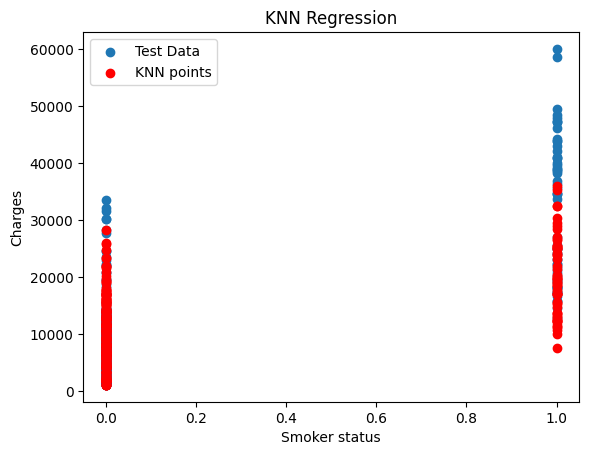

In [ ]:
plt.scatter(X_test_1['smoker_yes'], y_test_1, label='Test Data')
plt.scatter(X_test_1['smoker_yes'], KNN_y_pred_1, color='red', linewidth=1, label='KNN points')
plt.xlabel('Smoker status')
plt.ylabel('Charges')
plt.title('KNN Regression')
plt.legend()
plt.show()

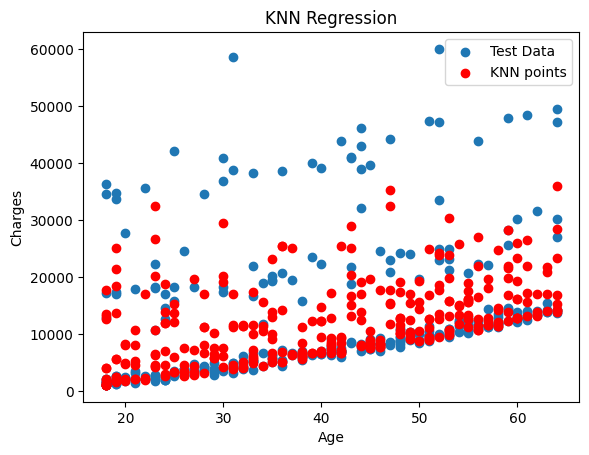

In [ ]:
plt.scatter(X_test_1['age'], y_test_1, label='Test Data')
plt.scatter(X_test_1['age'], KNN_y_pred_1, color='red', linewidth=1, label='KNN points')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('KNN Regression')
plt.legend()
plt.show()

In [ ]:
# try different values of n_neighbors
for i in range(1, 50):
  Knn_model_1 = KNeighborsRegressor(n_neighbors=i)
  Knn_model_1.fit(X_train_1, y_train_1)
  Knn_y_pred_1 = Knn_model_1.predict(X_test_1)
  print(f"n_neighbors = {i}, R^2 score: {r2_score(y_test_1, Knn_y_pred_1)}")


n_neighbors = 1, R^2 score: 0.11438820754818835
n_neighbors = 2, R^2 score: 0.3246148410616372
n_neighbors = 3, R^2 score: 0.33441096939751125
n_neighbors = 4, R^2 score: 0.3387747370583898
n_neighbors = 5, R^2 score: 0.3713402972125063
n_neighbors = 6, R^2 score: 0.3534044535858957
n_neighbors = 7, R^2 score: 0.3685500776469529
n_neighbors = 8, R^2 score: 0.32230185074217654
n_neighbors = 9, R^2 score: 0.34510127439783744
n_neighbors = 10, R^2 score: 0.3381075036641963
n_neighbors = 11, R^2 score: 0.3294254121656417
n_neighbors = 12, R^2 score: 0.33822719443309923
n_neighbors = 13, R^2 score: 0.3317091490262961
n_neighbors = 14, R^2 score: 0.32733887690231966
n_neighbors = 15, R^2 score: 0.32693327200177624
n_neighbors = 16, R^2 score: 0.3298072208751661
n_neighbors = 17, R^2 score: 0.332105984691613
n_neighbors = 18, R^2 score: 0.3285215195232435
n_neighbors = 19, R^2 score: 0.2987680366458014
n_neighbors = 20, R^2 score: 0.3078373932518288
n_neighbors = 21, R^2 score: 0.300935986442

In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    Knn_X_train_1, Knn_X_test_1, Knn_y_train_1, Knn_y_test_1 = train_test_split(X_2, y_2, test_size=ratio, random_state=1)
    KNN_1 = KNeighborsRegressor(n_neighbors=5)
    KNN_1.fit(Knn_X_train_1, Knn_y_train_1)
    Knn_y_pred_1 = KNN_1.predict(Knn_X_test_1)
    Knn_rmse_1 = np.sqrt(metrics.mean_squared_error(Knn_y_test_1, Knn_y_pred_1))
    Knn_R2_1 = r2_score(Knn_y_test_1, Knn_y_pred_1)
    print(f"Split Ratio: {ratio}, RMSE: {Knn_rmse_1}, R Score: {Knn_R2_1}")


Split Ratio: 0.1, RMSE: 10835.841388790479, R Score: 0.25697584383110694
Split Ratio: 0.2, RMSE: 9665.305384428435, R Score: 0.37421136177992487
Split Ratio: 0.3, RMSE: 9619.630010228428, R Score: 0.34702614993719294
Split Ratio: 0.4, RMSE: 9938.217617177213, R Score: 0.3128582867939689


KNN Model after removing Insignificance:

In [ ]:
KNN_model_2=KNeighborsRegressor(n_neighbors=5)

In [ ]:
KNN_model_2.fit(X_train_2, y_train_2)

KNeighborsRegressor()

In [ ]:
KNN_y_pred_2 = KNN_model_2.predict(X_test_2)
KNN_y_pred_2

array([ 8165.26695  , 18192.71901  ,  9232.5112   , 21197.417812 ,
        4921.11803  , 26138.821124 , 16202.63524  , 14610.84098  ,
        8894.96736  ,  8260.90652  , 18279.274756 , 21414.624642 ,
       13324.41081  ,  7036.80772  ,  3255.77751  ,  9551.75507  ,
        7087.627102 ,  9390.89367  , 13999.28331  , 19929.52616  ,
       16422.02406  , 14646.960684 , 12056.76466  , 12326.783142 ,
        6842.9107738,  6619.29417  , 15867.571668 , 15173.10109  ,
       13407.186074 ,  3768.82155  , 17897.85705  ,  4977.0741   ,
       16897.74048  , 21790.145116 , 15071.35571  , 19428.691792 ,
       25030.657384 ,  8975.742862 , 15131.246918 , 25362.856748 ,
        7446.2728   , 11926.32699  , 10505.44012  , 21306.86568  ,
        9972.416652 , 12752.05873  ,  1848.23636  , 15675.30043  ,
        9090.84772  , 16109.62994  , 22466.685576 , 20138.957602 ,
        7034.659608 ,  9023.4637   , 12621.365388 ,  5913.833034 ,
        8185.78009  , 19770.39782  ,  9107.182266 , 16727.8335

In [ ]:
knn_2 = pd.DataFrame({'Predicted':KNN_y_pred_2,'Actual':y_test_2})
knn_2

,Predicted,Actual
559,8165.266950,1646.42970
1087,18192.719010,11353.22760
1020,9232.511200,8798.59300
460,21197.417812,10381.47870
802,4921.118030,2103.08000
...,...,...
1192,12256.424560,13019.16105
628,20933.647290,11365.95200
1098,13513.176664,23045.56616
1038,4514.155680,2250.83520


In [ ]:
r2_score(y_test_2,KNN_y_pred_2)

0.1711708120454566

In [ ]:
metrics.mean_absolute_error(y_test_2,KNN_y_pred_2)

7438.074961490745

In [ ]:
KNN_mse_2 = mean_squared_error(y_test_2, KNN_y_pred_2)
KNN_rmse_2 = np.sqrt(KNN_mse_2)
KNN_rmse_2

10558.89753496062

In [ ]:
KNN_mape_2 = mean_absolute_percentage_error(y_test_2, KNN_y_pred_2)
print(KNN_mape_2)
KNN_mape_2 = KNN_mape_2 * 100
KNN_mape_2

0.9053532181923223


90.53532181923222

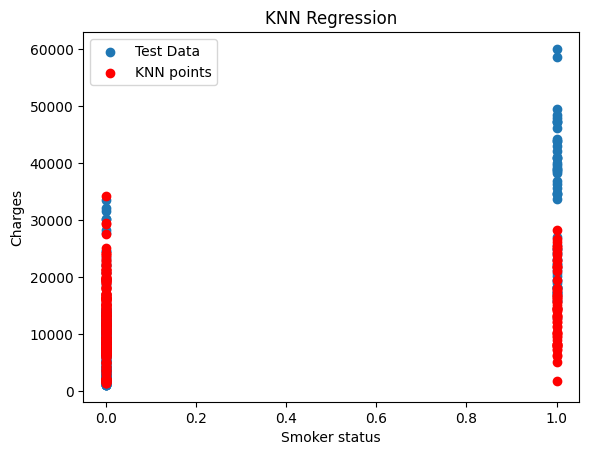

In [ ]:
plt.scatter(X_test_2['smoker_yes'], y_test_2, label='Test Data')
plt.scatter(X_test_2['smoker_yes'], KNN_y_pred_2, color='red', linewidth=1, label='KNN points')
plt.xlabel('Smoker status')
plt.ylabel('Charges')
plt.title('KNN Regression')
plt.legend()
plt.show()

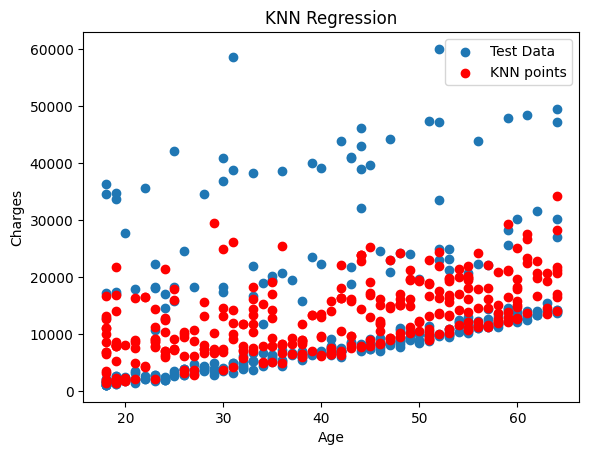

In [ ]:
plt.scatter(X_test_2['age'], y_test_2, label='Test Data')
plt.scatter(X_test_2['age'], KNN_y_pred_2, color='red', linewidth=1, label='KNN points')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('KNN Regression')
plt.legend()
plt.show()

In [ ]:
# try different values of n_neighbors
for i in range(1, 50):
  Knn_model_2 = KNeighborsRegressor(n_neighbors=i)
  Knn_model_2.fit(X_train_2, y_train_2)
  Knn_y_pred_2 = Knn_model_2.predict(X_test_2)
  print(f"n_neighbors = {i}, R^2 score: {r2_score(y_test_2, Knn_y_pred_2)}")


n_neighbors = 1, R^2 score: -0.29441531763878204
n_neighbors = 2, R^2 score: 0.21628803907626537
n_neighbors = 3, R^2 score: 0.18607462465926028
n_neighbors = 4, R^2 score: 0.2023008904826229
n_neighbors = 5, R^2 score: 0.1711708120454566
n_neighbors = 6, R^2 score: 0.18490103243860978
n_neighbors = 7, R^2 score: 0.1819136051109428
n_neighbors = 8, R^2 score: 0.17770637911309028
n_neighbors = 9, R^2 score: 0.17979117554227508
n_neighbors = 10, R^2 score: 0.1852275846914383
n_neighbors = 11, R^2 score: 0.18960786136923813
n_neighbors = 12, R^2 score: 0.18138205486016334
n_neighbors = 13, R^2 score: 0.17384000915723485
n_neighbors = 14, R^2 score: 0.16129365059779988
n_neighbors = 15, R^2 score: 0.1523854839125175
n_neighbors = 16, R^2 score: 0.14044571067632872
n_neighbors = 17, R^2 score: 0.15135293229234337
n_neighbors = 18, R^2 score: 0.14667635027455395
n_neighbors = 19, R^2 score: 0.15284826369599558
n_neighbors = 20, R^2 score: 0.1491382026542386
n_neighbors = 21, R^2 score: 0.163

In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    Knn_X_train_2, Knn_X_test_2, Knn_y_train_2, Knn_y_test_2 = train_test_split(X_3, y_3, test_size=ratio, random_state=1)
    KNN_2 = KNeighborsRegressor(n_neighbors=5)
    KNN_2.fit(Knn_X_train_2, Knn_y_train_2)
    Knn_y_pred_2 = KNN_2.predict(Knn_X_test_2)
    Knn_rmse_2 = np.sqrt(metrics.mean_squared_error(Knn_y_test_2, Knn_y_pred_2))
    Knn_R2_2 = r2_score(Knn_y_test_2, Knn_y_pred_2)
    print(f"Split Ratio: {ratio}, RMSE: {Knn_rmse_2}, R Score: {Knn_R2_2}")


Split Ratio: 0.1, RMSE: 12005.965281591629, R Score: 0.08783832586870588
Split Ratio: 0.2, RMSE: 11087.032694206855, R Score: 0.17656908301423835
Split Ratio: 0.3, RMSE: 11115.544471029014, R Score: 0.1281524866274879
Split Ratio: 0.4, RMSE: 11845.106203740903, R Score: 0.02387097461636445


KNN Model after removing Multicollinearity and then Insignificance:

In [ ]:
KNN_model_3=KNeighborsRegressor(n_neighbors=5)

In [ ]:
KNN_model_3.fit(X_train_3, y_train_3)

KNeighborsRegressor()

In [ ]:
KNN_y_pred_3 = KNN_model_3.predict(X_test_3)
KNN_y_pred_3

array([ 5968.706666, 11550.0036  ,  9293.55966 , 10214.182   ,
        2395.09125 , 17643.01477 ,  9446.32694 , 10940.09141 ,
        2801.78373 , 28176.09945 , 16131.195354, 15018.128402,
        6922.31155 ,  8372.472748,  1755.06565 , 13193.020942,
       12548.22026 , 16571.657322, 14320.51696 , 13453.20058 ,
       13045.440396, 17975.09295 , 14614.28407 , 12260.682532,
        1755.06565 ,  7966.346148, 15057.99959 , 10847.915102,
       10967.93015 ,  3903.47352 , 16478.773804,  9605.731766,
       20276.825612, 35461.204916, 26120.71339 , 13326.371384,
       19103.11177 , 11073.70289 , 12034.77239 , 34236.584028,
        7523.687856, 12034.77239 , 13470.501468, 14320.51696 ,
        4821.41886 , 16131.195354,  2151.4626  , 19155.52293 ,
        9293.55966 , 12919.23801 , 15394.626952, 16007.123204,
        5862.446684,  8964.60096 , 20994.15064 ,  4167.3155  ,
       22754.7352  , 16131.195354,  5808.30407 ,  1755.06565 ,
        9862.99854 , 15394.626952, 32273.39297 ,  8270.

In [ ]:
knn_3 = pd.DataFrame({'Predicted':KNN_y_pred_3,'Actual':y_test_3})
knn_3

,Predicted,Actual
559,5968.706666,1646.42970
1087,11550.003600,11353.22760
1020,9293.559660,8798.59300
460,10214.182000,10381.47870
802,2395.091250,2103.08000
...,...,...
1192,11860.801790,13019.16105
628,12034.772390,11365.95200
1098,13045.440396,23045.56616
1038,2057.139770,2250.83520


In [ ]:
r2_score(y_test_3,KNN_y_pred_3)

0.4734260940280596

In [ ]:
metrics.mean_absolute_error(y_test_3,KNN_y_pred_3)

4992.1960638925375

In [ ]:
KNN_mse_3 = mean_squared_error(y_test_3, KNN_y_pred_3)
KNN_rmse_3 = np.sqrt(KNN_mse_3)
KNN_rmse_3

8416.193736008165

In [ ]:
KNN_mape_3 = mean_absolute_percentage_error(y_test_3, KNN_y_pred_3)
print(KNN_mape_3)
KNN_mape_3 = KNN_mape_3 * 100
KNN_mape_3

0.5055283409024008


50.55283409024008

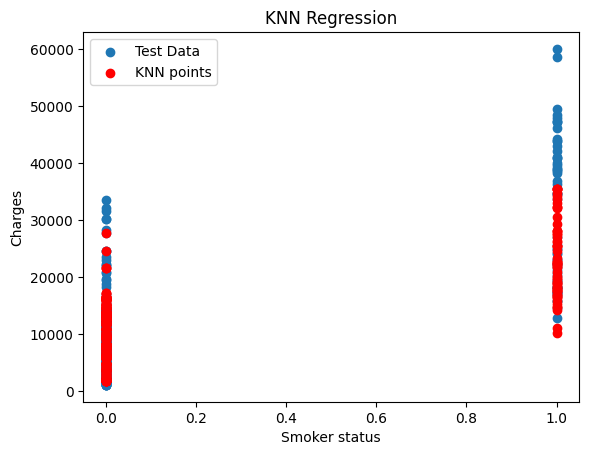

In [ ]:
plt.scatter(X_test_3['smoker_yes'], y_test_3, label='Test Data')
plt.scatter(X_test_3['smoker_yes'], KNN_y_pred_3, color='red', linewidth=1, label='KNN points')
plt.xlabel('Smoker status')
plt.ylabel('Charges')
plt.title('KNN Regression')
plt.legend()
plt.show()

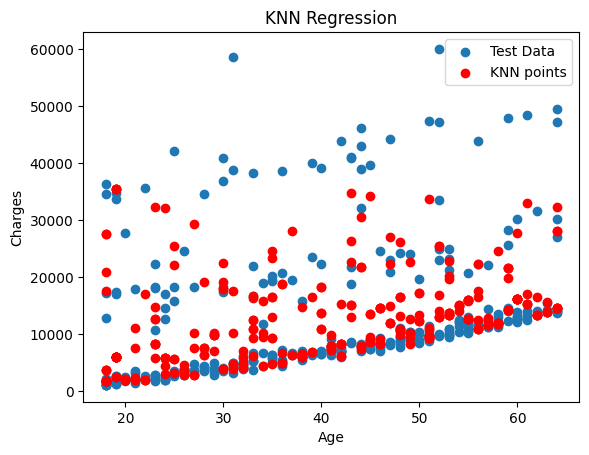

In [ ]:
plt.scatter(X_test_3['age'], y_test_3, label='Test Data')
plt.scatter(X_test_3['age'], KNN_y_pred_3, color='red', linewidth=1, label='KNN points')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('KNN Regression')
plt.legend()
plt.show()

In [ ]:
# try different values of n_neighbors
for i in range(1, 50):
  Knn_model_3 = KNeighborsRegressor(n_neighbors=i)
  Knn_model_3.fit(X_train_3, y_train_3)
  Knn_y_pred_3 = Knn_model_3.predict(X_test_3)
  print(f"n_neighbors = {i}, R^2 score: {r2_score(y_test_3, Knn_y_pred_3)}")


n_neighbors = 1, R^2 score: 0.2599139380079857
n_neighbors = 2, R^2 score: 0.4307484727982368
n_neighbors = 3, R^2 score: 0.4529105110354409
n_neighbors = 4, R^2 score: 0.48168528862334525
n_neighbors = 5, R^2 score: 0.4734260940280596
n_neighbors = 6, R^2 score: 0.49472885131193156
n_neighbors = 7, R^2 score: 0.4829636591683961
n_neighbors = 8, R^2 score: 0.46469651768499665
n_neighbors = 9, R^2 score: 0.47123462460433263
n_neighbors = 10, R^2 score: 0.47291611693438673
n_neighbors = 11, R^2 score: 0.47865240074446935
n_neighbors = 12, R^2 score: 0.4690602455855384
n_neighbors = 13, R^2 score: 0.4581015264438838
n_neighbors = 14, R^2 score: 0.43732660737198903
n_neighbors = 15, R^2 score: 0.42041843974709725
n_neighbors = 16, R^2 score: 0.4065652451482994
n_neighbors = 17, R^2 score: 0.39316664193006057
n_neighbors = 18, R^2 score: 0.38753628902913795
n_neighbors = 19, R^2 score: 0.3849761230010853
n_neighbors = 20, R^2 score: 0.367701316418381
n_neighbors = 21, R^2 score: 0.354539692

In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    Knn_X_train_3, Knn_X_test_3, Knn_y_train_3, Knn_y_test_3 = train_test_split(X_4, y_4, test_size=ratio, random_state=1)
    KNN_3 = KNeighborsRegressor(n_neighbors=5)
    KNN_3.fit(Knn_X_train_3, Knn_y_train_3)
    Knn_y_pred_3 = KNN_3.predict(Knn_X_test_3)
    Knn_rmse_3 = np.sqrt(metrics.mean_squared_error(Knn_y_test_3, Knn_y_pred_3))
    Knn_R2_3 = r2_score(Knn_y_test_3, Knn_y_pred_3)
    print(f"Split Ratio: {ratio}, RMSE: {Knn_rmse_3}, R Score: {Knn_R2_3}")


Split Ratio: 0.1, RMSE: 9295.00640395381, R Score: 0.45326479309803813
Split Ratio: 0.2, RMSE: 8659.96170230845, R Score: 0.4976244951703237
Split Ratio: 0.3, RMSE: 8554.570416500665, R Score: 0.48361280642714766
Split Ratio: 0.4, RMSE: 8686.525621731646, R Score: 0.47504567420184984


In [ ]:
#R Squared values:

print(f"Model 1: {(r2_score(y_test,KNN_y_pred))}")
print(f"Model 2: {(r2_score(y_test_1,KNN_y_pred_1))}")
print(f"Model 3: {(r2_score(y_test_2,KNN_y_pred_2))}")
print(f"Model 4: {(r2_score(y_test_3,KNN_y_pred_3))}")

Model 1: 0.1525119628149023
Model 2: 0.3713402972125063
Model 3: 0.1711708120454566
Model 4: 0.4734260940280596


#SVM REGRESSOR ALGORITHM

In [ ]:
SVR_model = SVR(kernel='linear')

In [ ]:
SVR_model.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
SVR_y_pred = SVR_model.predict(X_test)
SVR_y_pred

array([ 1729.84604621, 11796.66969458, 10165.12005253, 10442.82210715,
        2439.08040565,  5831.47087174, 10146.77850771, 11592.13745506,
        3844.76425765,  6755.39502335, 12636.94234792, 11502.14711724,
        7492.25202855,  8069.9629807 ,  1455.22528409,  9837.91981555,
        5428.88648487,  6687.47664552, 12619.11366078, 13136.88107045,
       10476.16208408,  5621.77668224,  8938.27816509,  9891.14711275,
        1523.18438032,  7790.6974942 ,  8796.54624545,  9464.44576054,
        5925.1043038 ,  4639.29365348, 11785.92244474,  6125.06396891,
       11714.48131925,  1938.73380766, 10380.52156331, 10730.41748158,
        4810.50884199,  3364.53602989, 12119.44640346,  9124.48783722,
        4637.70553617, 12064.13365899, 10700.24242083, 12522.10321258,
        5387.07275758, 12592.20440615,  2222.83929074,  4314.92380497,
       10254.95893147, 12804.67409777, 12848.05779333, 11752.49808019,
        3044.64308926,  9335.82175336,  1909.68994277,  5233.72325959,
      

In [ ]:
svm = pd.DataFrame({'Predicted':SVR_y_pred,'Actual':y_test})
svm

,Predicted,Actual
559,1729.846046,1646.42970
1087,11796.669695,11353.22760
1020,10165.120053,8798.59300
460,10442.822107,10381.47870
802,2439.080406,2103.08000
...,...,...
1192,12362.268840,13019.16105
628,12021.030706,11365.95200
1098,10534.075344,23045.56616
1038,2522.186618,2250.83520


In [ ]:
r2_score(y_test,SVR_y_pred)

-0.08818394289501663

In [ ]:
metrics.mean_absolute_error(y_test,SVR_y_pred)

5894.915677187849

In [ ]:
mean_squared_error(y_test,SVR_y_pred)

146377534.3318255

In [ ]:
SVR_mse = mean_squared_error(y_test, SVR_y_pred)
SVR_rmse = np.sqrt(SVR_mse)
SVR_rmse

12098.658369084793

In [ ]:
SVR_mape = mean_absolute_percentage_error(y_test,SVR_y_pred)
print(SVR_mape)
SVR_mape = SVR_mape * 100
SVR_mape

0.2675974939187833


26.75974939187833

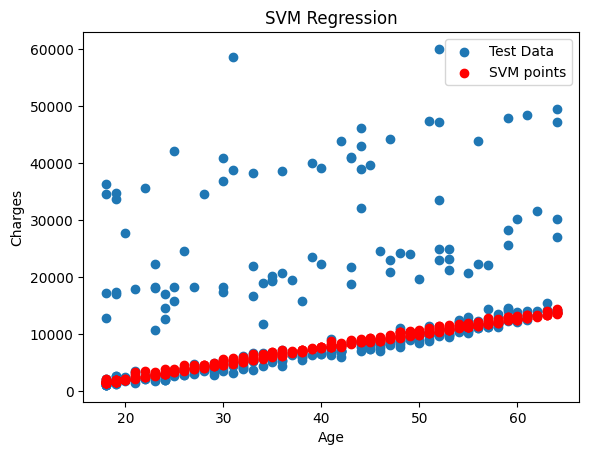

In [ ]:
plt.scatter(X_test['age'], y_test, label='Test Data')
plt.scatter(X_test['age'], SVR_y_pred, color='red', linewidth=1, label='SVM points')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('SVM Regression')
plt.legend()
plt.show()

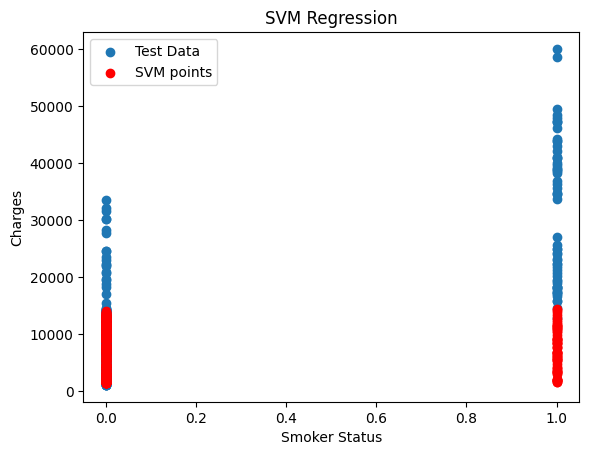

In [ ]:
plt.scatter(X_test['smoker_yes'], y_test, label='Test Data')
plt.scatter(X_test['smoker_yes'], SVR_y_pred, color='red', linewidth=1, label='SVM points')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.title('SVM Regression')
plt.legend()
plt.show()

In [ ]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
  SVR_model = SVR(kernel=kernel)
  SVR_model.fit(X_train, y_train)
  SVR_y_PRED = SVR_model.predict(X_test)
  print(f"Kernel = {kernel}, R^2 score: {r2_score(y_test, SVR_y_PRED)}")


Kernel = linear, R^2 score: -0.08818394289501663
Kernel = poly, R^2 score: -0.07666024116227921
Kernel = rbf, R^2 score: -0.09246213776984025
Kernel = sigmoid, R^2 score: -0.09380102160682369


In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    SVR_X_train, SVR_X_test, SVR_y_train, SVR_y_test = train_test_split(X_1, y_1, test_size=ratio, random_state=1)
    SVR_model = SVR(kernel='linear')
    SVR_model.fit(SVR_X_train, SVR_y_train)
    Svr_y_pred = SVR_model.predict(SVR_X_test)
    SVR_rmse = np.sqrt(metrics.mean_squared_error(SVR_y_test, Svr_y_pred))
    SVR_R2 = r2_score(SVR_y_test, Svr_y_pred)
    print(f"Split Ratio: {ratio}, RMSE: {SVR_rmse}, R Score: {SVR_R2}")


Split Ratio: 0.1, RMSE: 14422.247643842617, R Score: -0.3162656611582748
Split Ratio: 0.2, RMSE: 13013.087991714845, R Score: -0.13437656431767087
Split Ratio: 0.3, RMSE: 12619.18428134492, R Score: -0.12367732495468231
Split Ratio: 0.4, RMSE: 12960.348445702371, R Score: -0.16859134294415923


SVM - Regressor Algorithm after removing Multicolinearity:

In [ ]:
SVR_model_1 = SVR(kernel='linear')

In [ ]:
SVR_model_1.fit(X_train_1, y_train_1)

SVR(kernel='linear')

In [ ]:
SVR_y_pred_1 = SVR_model_1.predict(X_test_1)
SVR_y_pred_1

array([ 1721.32026823, 11790.51098884, 10154.20670251, 10436.34151355,
        2441.7309126 ,  5823.72062227, 10138.02414094, 11590.53228567,
        3844.71782633,  6757.94115951, 12640.45133251, 11484.34548996,
        7488.2371092 ,  8067.71574655,  1449.91373191,  9833.04120362,
        5431.02211267,  6686.63543497, 12612.35793466, 13130.40450471,
       10469.18540568,  5613.74615325,  8937.17732122,  9889.22799933,
        1521.34156506,  7787.73704338,  8795.03299307,  9460.70689442,
        5919.7927233 ,  4639.65393585, 11777.41759099,  6123.33935919,
       11718.2520921 ,  1933.32026823, 10383.36281038, 10730.59617615,
        4801.65393585,  3364.38682856, 12110.49392616,  9121.08392337,
        4634.90344158, 12055.48969202, 10701.32021673, 12510.92163322,
        5389.83531696, 12589.01503107,  2216.75644358,  4311.70076365,
       10262.07083709, 12803.05221012, 12843.99796839, 11749.32419313,
        3046.2137841 ,  9336.42246671,  1908.79480308,  5221.04764364,
      

In [ ]:
svm_1 = pd.DataFrame({'Predicted':SVR_y_pred_1,'Actual':y_test_1})
svm_1

,Predicted,Actual
559,1721.320268,1646.42970
1087,11790.510989,11353.22760
1020,10154.206703,8798.59300
460,10436.341514,10381.47870
802,2441.730913,2103.08000
...,...,...
1192,12357.374997,13019.16105
628,12009.057625,11365.95200
1098,10530.617473,23045.56616
1038,2519.824310,2250.83520


In [ ]:
r2_score(y_test_1,SVR_y_pred_1)

-0.08857857985525919

In [ ]:
metrics.mean_absolute_error(y_test_1,SVR_y_pred_1)

5894.96050892523

In [ ]:
mean_squared_error(y_test_1,SVR_y_pred_1)

146430619.09343562

In [ ]:
SVR_mse_1 = mean_squared_error(y_test_1, SVR_y_pred_1)
SVR_rmse_1 = np.sqrt(SVR_mse_1)
SVR_rmse_1

12100.851998658425

In [ ]:
SVR_mape_1 = mean_absolute_percentage_error(y_test_1,SVR_y_pred_1)
print(SVR_mape_1)
SVR_mape_1 = SVR_mape_1 * 100
SVR_mape_1

0.2673843172819615


26.73843172819615

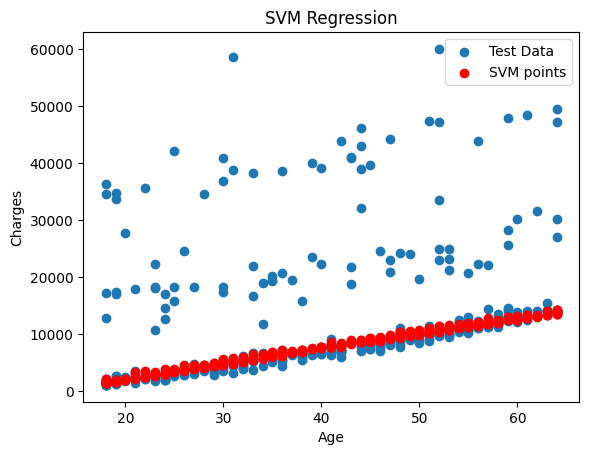

In [ ]:
plt.scatter(X_test_1['age'], y_test_1, label='Test Data')
plt.scatter(X_test_1['age'], SVR_y_pred_1, color='red', linewidth=1, label='SVM points')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('SVM Regression')
plt.legend()
plt.show()

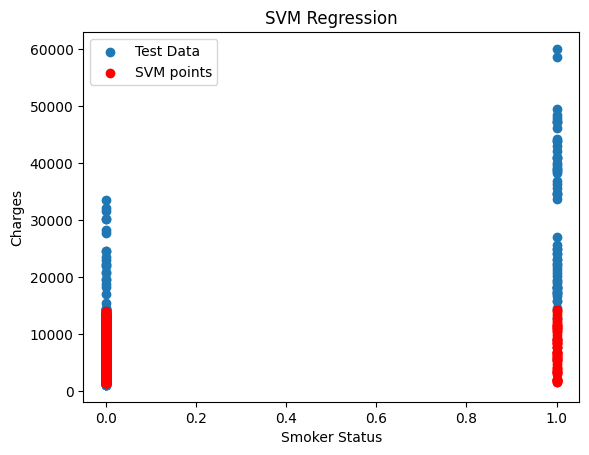

In [ ]:
plt.scatter(X_test_1['smoker_yes'], y_test_1, label='Test Data')
plt.scatter(X_test_1['smoker_yes'], SVR_y_pred_1, color='red', linewidth=1, label='SVM points')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.title('SVM Regression')
plt.legend()
plt.show()

In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    SVR_X_train_1, SVR_X_test_1, SVR_y_train_1, SVR_y_test_1 = train_test_split(X_2, y_2, test_size=ratio, random_state=1)
    SVR_model_1 = SVR(kernel='linear')
    SVR_model_1.fit(SVR_X_train_1, SVR_y_train_1)
    Svr_y_pred_1 = SVR_model_1.predict(SVR_X_test_1)
    SVR_rmse_1 = np.sqrt(metrics.mean_squared_error(SVR_y_test_1, Svr_y_pred_1))
    SVR_R2_1 = r2_score(SVR_y_test_1, Svr_y_pred_1)
    print(f"Split Ratio: {ratio}, RMSE: {SVR_rmse_1}, R Score: {SVR_R2_1}")


Split Ratio: 0.1, RMSE: 14414.24934132623, R Score: -0.3148061145014185
Split Ratio: 0.2, RMSE: 12997.106168585546, R Score: -0.13159194118292117
Split Ratio: 0.3, RMSE: 12616.786242187989, R Score: -0.12325029795614872
Split Ratio: 0.4, RMSE: 12952.635684949302, R Score: -0.16720088903369423


SVM Regressor Model after removing Insignificance:

In [ ]:
SVR_model_2 = SVR(kernel='linear')

In [ ]:
SVR_model_2.fit(X_train_2, y_train_2)

SVR(kernel='linear')

In [ ]:
SVR_y_pred_2 = SVR_model_2.predict(X_test_2)
SVR_y_pred_2

array([ 1749.82577991, 11807.39308437, 10223.95799464, 10401.25271682,
        2502.49742336,  5845.20697054, 10166.36015859, 11539.81432851,
        3858.95742879,  6719.03859255, 12595.03279671, 11498.9803858 ,
        7513.70572469,  8069.11109206,  1484.00487475,  9894.62258519,
        5444.42667097,  6685.92443163, 12577.4145714 , 13132.83899406,
       10485.15799143,  5584.87398954,  8891.2710739 ,  9949.27637859,
        1479.89369545,  7803.77133303,  8803.78340435,  9426.14275625,
        5925.60208835,  4652.73294521, 11782.40998862,  6184.75364123,
       11658.98641331,  1958.38629966, 10338.20905022, 10741.42266754,
        4874.10814899,  3424.92979629, 12079.32121069,  9076.85406741,
        4601.83304439, 12074.8813276 , 10657.64125232, 12577.96717487,
        5387.1956493 , 12598.90578485,  2250.12002686,  4341.11341293,
       10205.90310525, 12747.69218222, 12866.51312366, 11747.55625149,
        3062.37602058,  9331.74754327,  1924.99982003,  5200.1525375 ,
      

In [ ]:
svm_2 = pd.DataFrame({'Predicted':SVR_y_pred_2,'Actual':y_test_2})
svm_2

,Predicted,Actual
559,1749.825780,1646.42970
1087,11807.393084,11353.22760
1020,10223.957995,8798.59300
460,10401.252717,10381.47870
802,2502.497423,2103.08000
...,...,...
1192,12308.711553,13019.16105
628,12078.320808,11365.95200
1098,10482.895175,23045.56616
1038,2537.808487,2250.83520


In [ ]:
r2_score(y_test_2,SVR_y_pred_2)

-0.08856079953992957

In [ ]:
metrics.mean_absolute_error(y_test_2,SVR_y_pred_2)

5902.522030892019

In [ ]:
mean_squared_error(y_test_2,SVR_y_pred_2)

146428227.36661902

In [ ]:
SVR_mse_2 = mean_squared_error(y_test_2, SVR_y_pred_2)
SVR_rmse_2 = np.sqrt(SVR_mse_2)
SVR_rmse_2

12100.753173526804

In [ ]:
SVR_mape_2 = mean_absolute_percentage_error(y_test_2,SVR_y_pred_2)
print(SVR_mape_2)
SVR_mape_2 = SVR_mape_2 * 100
SVR_mape_2

0.26986157797864235


26.986157797864234

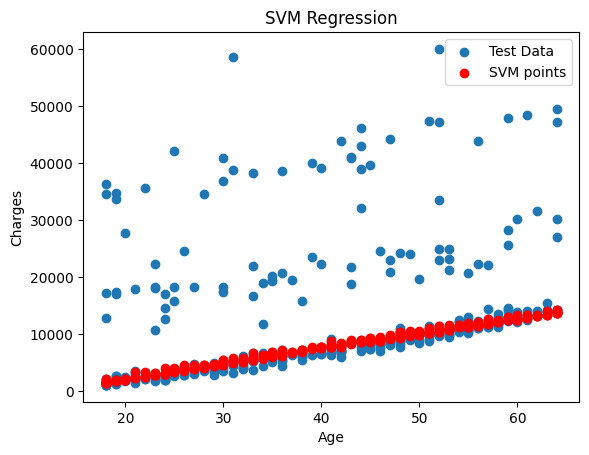

In [ ]:
plt.scatter(X_test_2['age'], y_test_2, label='Test Data')
plt.scatter(X_test_2['age'], SVR_y_pred_2, color='red', linewidth=1, label='SVM points')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('SVM Regression')
plt.legend()
plt.show()

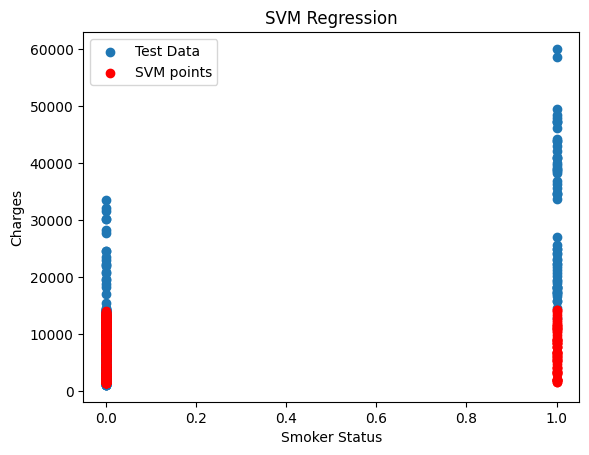

In [ ]:
plt.scatter(X_test_2['smoker_yes'], y_test_2, label='Test Data')
plt.scatter(X_test_2['smoker_yes'], SVR_y_pred_2, color='red', linewidth=1, label='SVM points')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.title('SVM Regression')
plt.legend()
plt.show()

In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    SVR_X_train_2, SVR_X_test_2, SVR_y_train_2, SVR_y_test_2 = train_test_split(X_3, y_3, test_size=ratio, random_state=1)
    SVR_model_2 = SVR(kernel='linear')
    SVR_model_2.fit(SVR_X_train_2, SVR_y_train_2)
    Svr_y_pred_2 = SVR_model_2.predict(SVR_X_test_2)
    SVR_rmse_2 = np.sqrt(metrics.mean_squared_error(SVR_y_test_2, Svr_y_pred_2))
    SVR_R2_2 = r2_score(SVR_y_test_2, Svr_y_pred_2)
    print(f"Split Ratio: {ratio}, RMSE: {SVR_rmse_2}, R Score: {SVR_R2_2}")


Split Ratio: 0.1, RMSE: 14422.23832861346, R Score: -0.31626396082520514
Split Ratio: 0.2, RMSE: 13004.881314826513, R Score: -0.13294623103435343
Split Ratio: 0.3, RMSE: 12613.94297149996, R Score: -0.12274409221949445
Split Ratio: 0.4, RMSE: 12963.700595311002, R Score: -0.1691959253944697


SVM Regressor Model after removing Multicollinearity and then Insignificance:

In [ ]:
SVR_model_3 = SVR(kernel='linear')

In [ ]:
SVR_model_3.fit(X_train_3, y_train_3)

SVR(kernel='linear')

In [ ]:
SVR_y_pred_3 = SVR_model_3.predict(X_test_3)
SVR_y_pred_3

array([ 1740.24503455, 11804.72723198, 10215.59846397, 10393.09855499,
        2505.69118401,  5837.71225094, 10157.36199487, 11539.87243731,
        3859.08339191,  6719.6313386 , 12599.29161599, 11481.63596821,
        7508.81404817,  8067.64187206,  1475.39023988,  9892.5072002 ,
        5448.21215992,  6685.13142962, 12570.17338144, 13129.00120533,
       10480.45325864,  5572.85745627,  8891.32449062,  9950.7436693 ,
        1475.39023988,  7802.78707739,  8803.96978697,  9421.03407996,
        5919.68528016,  4653.64777591, 11775.60899743,  6184.54007483,
       11664.51773366,  1952.24503455, 10340.24376032, 10745.30805331,
        4865.64777591,  3424.90086436, 12069.58202665,  9074.20625607,
        4595.41130681, 12069.58202665, 10657.95334965, 12570.17338144,
        5389.97569082, 12599.29161599,  2240.83638934,  4335.93818657,
       10215.59846397, 12747.67347246, 12864.14641066, 11746.49076288,
        3064.5190079 ,  9333.67937631,  1923.1268    ,  5183.35736525,
      

In [ ]:
svm_3 = pd.DataFrame({'Predicted':SVR_y_pred_3,'Actual':y_test_3})
svm_3

,Predicted,Actual
559,1740.245035,1646.42970
1087,11804.727232,11353.22760
1020,10215.598464,8798.59300
460,10393.098555,10381.47870
802,2505.691184,2103.08000
...,...,...
1192,12305.318587,13019.16105
628,12069.582027,11365.95200
1098,10480.453259,23045.56616
1038,2534.809419,2250.83520


In [ ]:
r2_score(y_test_3,SVR_y_pred_3)

-0.08897821552003471

In [ ]:
metrics.mean_absolute_error(y_test_3,SVR_y_pred_3)

5902.536273431215

In [ ]:
mean_squared_error(y_test_3,SVR_y_pred_3)

146484376.25795072

In [ ]:
SVR_mse_3 = mean_squared_error(y_test_3, SVR_y_pred_3)
SVR_rmse_3 = np.sqrt(SVR_mse_3)
SVR_rmse_3

12103.073008866415

In [ ]:
SVR_mape_3 = mean_absolute_percentage_error(y_test_3,SVR_y_pred_3)
print(SVR_mape_3)
SVR_mape_3 = SVR_mape_3 * 100
SVR_mape_3

0.269620674677861


26.9620674677861

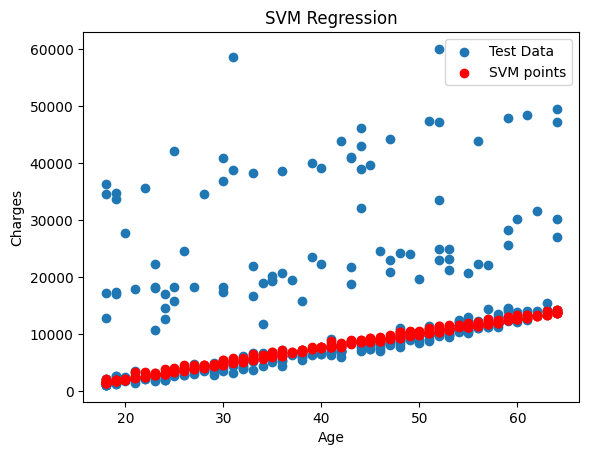

In [ ]:
plt.scatter(X_test_3['age'], y_test_3, label='Test Data')
plt.scatter(X_test_3['age'], SVR_y_pred_3, color='red', linewidth=1, label='SVM points')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('SVM Regression')
plt.legend()
plt.show()

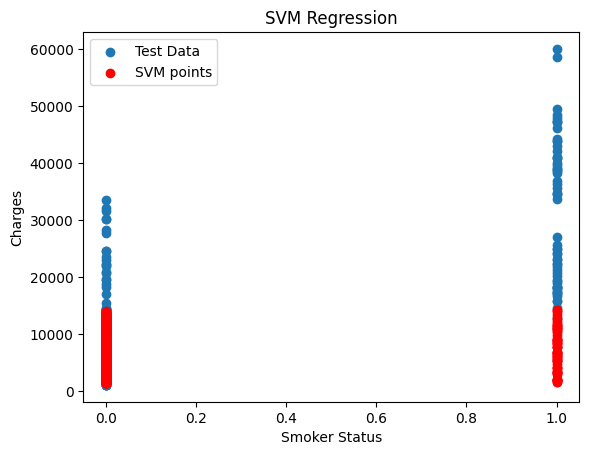

In [ ]:
plt.scatter(X_test_3['smoker_yes'], y_test_3, label='Test Data')
plt.scatter(X_test_3['smoker_yes'], SVR_y_pred_3, color='red', linewidth=1, label='SVM points')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.title('SVM Regression')
plt.legend()
plt.show()

In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    SVR_X_train_3, SVR_X_test_3, SVR_y_train_3, SVR_y_test_3 = train_test_split(X_4, y_4, test_size=ratio, random_state=1)
    SVR_model_3 = SVR(kernel='linear')
    SVR_model_3.fit(SVR_X_train_3, SVR_y_train_3)
    Svr_y_pred_3 = SVR_model_3.predict(SVR_X_test_3)
    SVR_rmse_3 = np.sqrt(metrics.mean_squared_error(SVR_y_test_3, Svr_y_pred_3))
    SVR_R2_3 = r2_score(SVR_y_test_3, Svr_y_pred_3)
    print(f"Split Ratio: {ratio}, RMSE: {SVR_rmse_3}, R Score: {SVR_R2_3}")


Split Ratio: 0.1, RMSE: 14417.051022687017, R Score: -0.3153172789321128
Split Ratio: 0.2, RMSE: 12989.04875600544, R Score: -0.13018934020167716
Split Ratio: 0.3, RMSE: 12616.29690439155, R Score: -0.12316316987834353
Split Ratio: 0.4, RMSE: 12956.69169762298, R Score: -0.16793200244552486


In [ ]:
#R Squared values:

print(f"Model 1: {(r2_score(y_test,SVR_y_pred))}")
print(f"Model 2: {(r2_score(y_test_1,SVR_y_pred_1))}")
print(f"Model 3: {(r2_score(y_test_2,SVR_y_pred_2))}")
print(f"Model 4: {(r2_score(y_test_3,SVR_y_pred_3))}")

Model 1: -0.08818394289501663
Model 2: -0.08857857985525919
Model 3: -0.08856079953992957
Model 4: -0.08897821552003471


#DECISION TREE ALGORITHM

In [ ]:
dt_model = DecisionTreeRegressor()

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
DT_y_pred = dt_model.predict(X_test)

In [ ]:
DT_y_pred

array([ 1263.249  , 11842.62375,  8457.818  , 10702.6424 ,  1964.78   ,
       39983.42595,  8978.1851 , 11658.37915,  2483.736  , 20149.3229 ,
       13451.122  , 12105.32   ,  6238.298  ,  7640.3092 ,  1137.011  ,
       21232.18226,  4185.0979 ,  6746.7425 , 11576.13   , 13470.86   ,
        9140.951  , 39241.442  ,  7731.85785,  8782.469  , 21344.8467 ,
        6393.60345,  8891.1395 ,  8280.6227 , 14358.36437,  2866.091  ,
       11763.0009 ,  4746.344  , 22218.1149 , 36898.73308, 21098.55405,
       10197.7722 , 36950.2567 , 16232.847  , 24227.33724, 40974.1649 ,
       18903.49141, 12231.6136 , 10702.6424 , 11576.13   ,  4719.52405,
       13217.0945 ,  1391.5287 , 37270.1512 ,  9566.9909 , 13430.265  ,
       13143.86485, 12105.32   ,  2395.17155, 26236.57997, 16450.8947 ,
        3989.841  , 40974.1649 , 12638.195  ,  3180.5101 ,  1146.7966 ,
        3268.84665, 13143.86485, 35147.52848,  2850.68375, 13228.84695,
        8964.06055, 10600.5483 , 12044.342  ,  2710.82855, 13747

In [ ]:
dtr = pd.DataFrame({'Predicted':DT_y_pred,'Actual':y_test})
dtr

,Predicted,Actual
559,1263.24900,1646.42970
1087,11842.62375,11353.22760
1020,8457.81800,8798.59300
460,10702.64240,10381.47870
802,1964.78000,2103.08000
...,...,...
1192,11554.22360,13019.16105
628,20709.02034,11365.95200
1098,10797.33620,23045.56616
1038,2741.94800,2250.83520


In [ ]:
r2_score(y_test,DT_y_pred)

0.6604425404213328

In [ ]:
metrics.mean_absolute_error(y_test,DT_y_pred)

3300.103573044776

In [ ]:
mean_squared_error(y_test,DT_y_pred)

45675718.725339614

In [ ]:
DT_mse = mean_squared_error(y_test, DT_y_pred)
DT_rmse = np.sqrt(DT_mse)
DT_rmse

6758.381368740566

In [ ]:
DT_mape = mean_absolute_percentage_error(y_test,DT_y_pred)
print(DT_mape)
DT_mape = DT_mape * 100
DT_mape

0.39774698756271587


39.77469875627159

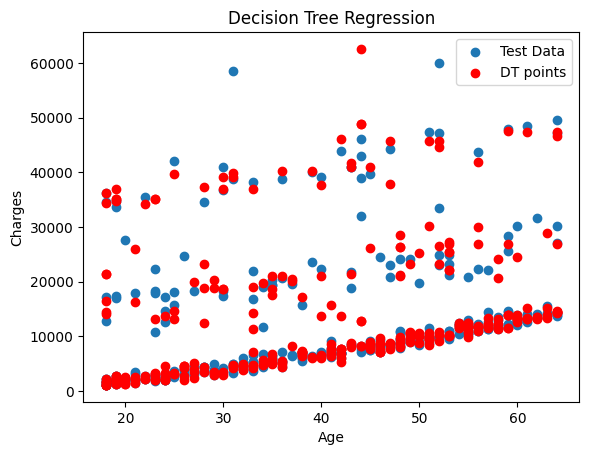

In [ ]:
plt.scatter(X_test['age'], y_test, label='Test Data')
plt.scatter(X_test['age'], DT_y_pred, color='red', linewidth=1, label='DT points')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

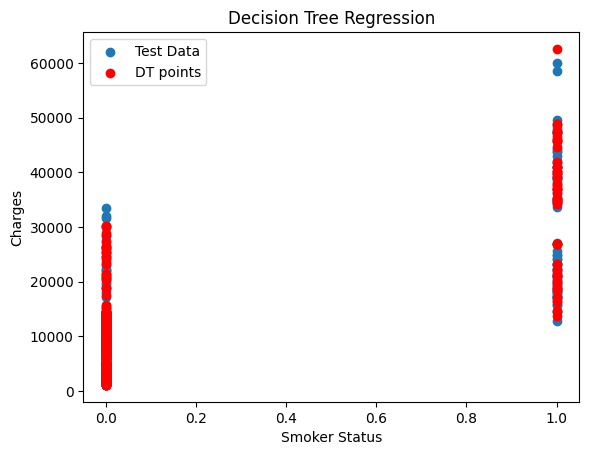

In [ ]:
plt.scatter(X_test['smoker_yes'], y_test, label='Test Data')
plt.scatter(X_test['smoker_yes'], DT_y_pred, color='red', linewidth=1, label='DT points')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    DT_X_train, DT_X_test, DT_y_train, DT_y_test = train_test_split(X_1, y_1, test_size=ratio, random_state=1)
    DT_model = DecisionTreeRegressor()
    DT_model.fit(DT_X_train, DT_y_train)
    Dt_y_pred = DT_model.predict(DT_X_test)
    DT_rmse = np.sqrt(metrics.mean_squared_error(DT_y_test, Dt_y_pred))
    DT_R2 = r2_score(DT_y_test, Dt_y_pred)
    print(f"Split Ratio: {ratio}, RMSE: {DT_rmse}, R Score: {DT_R2}")


Split Ratio: 0.1, RMSE: 6389.894442534696, R Score: 0.7416163539399572
Split Ratio: 0.2, RMSE: 5916.536930249395, R Score: 0.7655060338807429
Split Ratio: 0.3, RMSE: 6765.891656369808, R Score: 0.6769802101404168
Split Ratio: 0.4, RMSE: 7041.938555597559, R Score: 0.6550042290030901


Decision Tree - Regressor Algorithm after removing Multicolinearity:

In [ ]:
dt_model_1 = DecisionTreeRegressor()

In [ ]:
dt_model_1.fit(X_train_1, y_train_1)

DecisionTreeRegressor()

In [ ]:
DT_y_pred_1 = dt_model_1.predict(X_test_1)
DT_y_pred_1

array([ 1629.39525   , 11945.1327    ,  8782.469     , 10977.2063    ,
        1972.425     , 20745.9891    ,  8978.1851    , 11658.049025  ,
        2493.0629    , 40419.0191    , 12648.7034    , 12105.32      ,
        6356.2707    ,  7639.41745   ,  1141.01698   , 10043.249     ,
        4320.41085   ,  6196.448     , 12244.531     , 13460.991     ,
        9140.951     , 19521.9682    ,  7731.85785   ,  8457.818     ,
        4411.60824718,  6391.49065   ,  8891.1395    ,  8280.6227    ,
        4934.705     ,  3857.75925   , 10593.628     , 27375.90478   ,
       46661.4424    , 26786.042875  , 46151.1245    , 10461.9794    ,
       36197.699     , 36189.1017    , 18030.55977   , 21677.28345   ,
        4058.1161    , 11735.87905   , 10702.6424    , 12333.828     ,
        4934.705     , 13136.73415   ,  1391.5287    , 39611.7577    ,
        9866.30485   , 12949.1554    , 24513.09126   , 12105.32      ,
       21595.38229   ,  8520.026     , 34303.1672    ,  3972.9247    ,
      

In [ ]:
dtr_1 = pd.DataFrame({'Predicted':DT_y_pred_1,'Actual':y_test_1})
dtr_1

,Predicted,Actual
559,1629.39525,1646.42970
1087,11945.13270,11353.22760
1020,8782.46900,8798.59300
460,10977.20630,10381.47870
802,1972.42500,2103.08000
...,...,...
1192,12430.95335,13019.16105
628,11354.13700,11365.95200
1098,10197.77220,23045.56616
1038,2254.79670,2250.83520


In [ ]:
r2_score(y_test_1,DT_y_pred_1)

0.36010704454764486

In [ ]:
metrics.mean_absolute_error(y_test_1,DT_y_pred_1)

4618.371095735369

In [ ]:
mean_squared_error(y_test_1,DT_y_pred_1)

86075478.01728307

In [ ]:
DT_mse_1 = mean_squared_error(y_test_1, DT_y_pred_1)
DT_rmse_1 = np.sqrt(DT_mse_1)
DT_rmse_1

9277.687104946095

In [ ]:
DT_mape_1 = mean_absolute_percentage_error(y_test_1,DT_y_pred_1)
print(DT_mape_1)
DT_mape_1 = DT_mape_1 * 100
DT_mape_1

0.3452798893714436


34.52798893714436

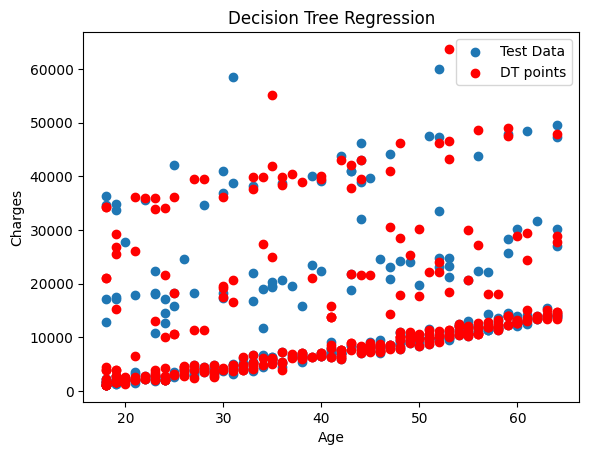

In [ ]:
plt.scatter(X_test_1['age'], y_test_1, label='Test Data')
plt.scatter(X_test_1['age'], DT_y_pred_1, color='red', linewidth=1, label='DT points')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

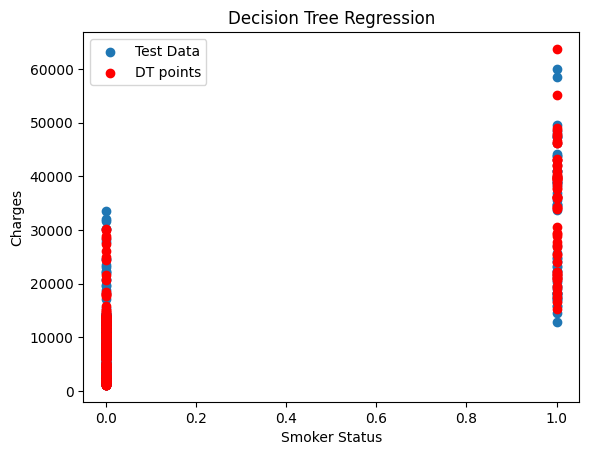

In [ ]:
plt.scatter(X_test_1['smoker_yes'], y_test_1, label='Test Data')
plt.scatter(X_test_1['smoker_yes'], DT_y_pred_1, color='red', linewidth=1, label='DT points')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    DT_X_train_1, DT_X_test_1, DT_y_train_1, DT_y_test_1 = train_test_split(X_2, y_2, test_size=ratio, random_state=1)
    Dt_model_1 = DecisionTreeRegressor()
    Dt_model_1.fit(DT_X_train_1, DT_y_train_1)
    Dt_y_pred_1 = Dt_model_1.predict(DT_X_test_1)
    Dt_rmse_1 = np.sqrt(metrics.mean_squared_error(DT_y_test_1, Dt_y_pred_1))
    Dt_R2_1 = r2_score(DT_y_test_1, Dt_y_pred_1)
    print(f"Split Ratio: {ratio}, RMSE: {Dt_rmse_1}, R Score: {Dt_R2_1}")


Split Ratio: 0.1, RMSE: 10003.522111368557, R Score: 0.36673785551318305
Split Ratio: 0.2, RMSE: 9329.913774754468, R Score: 0.41688827652617366
Split Ratio: 0.3, RMSE: 9625.274502621212, R Score: 0.34625963661955994
Split Ratio: 0.4, RMSE: 9426.839137894818, R Score: 0.3817537350794544


Decision Tree Regressor Model after removing Insignificance:

In [ ]:
dt_model_2 = DecisionTreeRegressor()

In [ ]:
dt_model_2.fit(X_train_2, y_train_2)

DecisionTreeRegressor()

In [ ]:
DT_y_pred_2 = dt_model_2.predict(X_test_2)
DT_y_pred_2

array([ 1263.249   , 11842.62375 ,  9283.562   , 28468.91901 ,
        2585.269   , 39983.42595 ,  8978.1851  , 11658.37915 ,
        3558.62025 , 20149.3229  , 12523.6048  , 10325.206   ,
        6238.298   ,  6282.235   ,  1137.011   , 25333.33284 ,
        4185.0979  ,  6746.7425  , 12333.828   , 13844.7972  ,
        9140.951   , 41949.2441  ,  8232.6388  ,  8827.2099  ,
       21344.8467  ,  7153.5539  ,  8891.1395  ,  8280.6227  ,
       14358.36437 ,  3161.454   , 11763.0009  ,  5002.7827  ,
       22218.1149  , 36898.73308 , 21978.6769  , 10422.91665 ,
       36950.2567  , 18223.4512  , 20709.02034 , 39556.4945  ,
        4449.462   , 11944.59435 , 11085.5868  , 12333.828   ,
        4719.52405 , 12146.971   ,  1532.4697  , 37079.372   ,
        9361.3268  , 12629.1656  , 13429.0354  , 11881.9696  ,
        2842.76075 ,  9095.06825 , 15518.18025 ,  3989.841   ,
       40974.1649  , 13228.84695 ,  3077.0955  ,  1146.7966  ,
        3268.84665 , 13143.86485 , 35147.52848 , 13126.

In [ ]:
dtr_2 = pd.DataFrame({'Predicted':DT_y_pred_2,'Actual':y_test_2})
dtr_2

,Predicted,Actual
559,1263.24900,1646.42970
1087,11842.62375,11353.22760
1020,9283.56200,8798.59300
460,28468.91901,10381.47870
802,2585.26900,2103.08000
...,...,...
1192,11945.13270,13019.16105
628,20709.02034,11365.95200
1098,10797.33620,23045.56616
1038,2156.75180,2250.83520


In [ ]:
r2_score(y_test_2,DT_y_pred_2)

0.6566390279584046

In [ ]:
metrics.mean_absolute_error(y_test_2,DT_y_pred_2)

3313.551502176119

In [ ]:
mean_squared_error(y_test_2,DT_y_pred_2)

46187349.85145477

In [ ]:
DT_mse_2 = mean_squared_error(y_test_2, DT_y_pred_2)
DT_rmse_2 = np.sqrt(DT_mse_2)
DT_rmse_2

6796.127562918075

In [ ]:
DT_mape_2 = mean_absolute_percentage_error(y_test_2,DT_y_pred_2)
print(DT_mape_2)
DT_mape_2 = DT_mape_2 * 100
DT_mape_2

0.43827676321475617


43.827676321475614

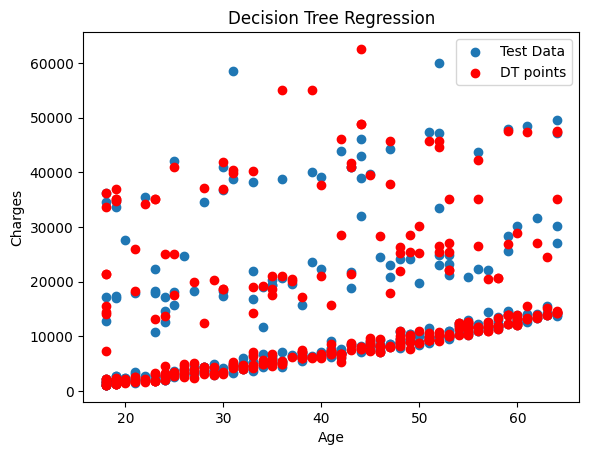

In [ ]:
plt.scatter(X_test_2['age'], y_test_2, label='Test Data')
plt.scatter(X_test_2['age'], DT_y_pred_2, color='red', linewidth=1, label='DT points')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

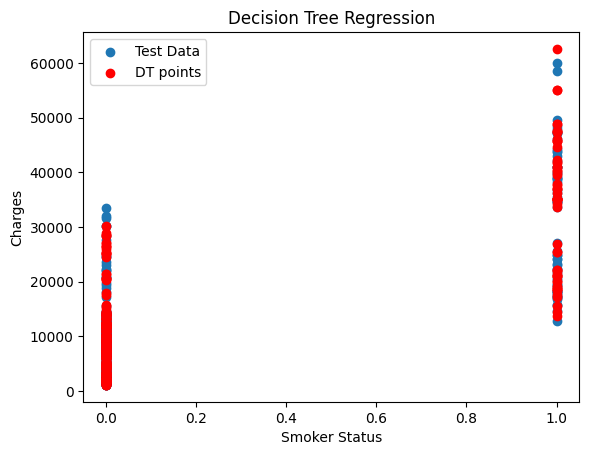

In [ ]:
plt.scatter(X_test_2['smoker_yes'], y_test_2, label='Test Data')
plt.scatter(X_test_2['smoker_yes'], DT_y_pred_2, color='red', linewidth=1, label='DT points')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    DT_X_train_2, DT_X_test_2, DT_y_train_2, DT_y_test_2 = train_test_split(X_3, y_3, test_size=ratio, random_state=1)
    Dt_model_2 = DecisionTreeRegressor()
    Dt_model_2.fit(DT_X_train_2, DT_y_train_2)
    Dt_y_pred_2 = Dt_model_2.predict(DT_X_test_2)
    Dt_rmse_2 = np.sqrt(metrics.mean_squared_error(DT_y_test_2, Dt_y_pred_2))
    Dt_R2_2 = r2_score(DT_y_test_2, Dt_y_pred_2)
    print(f"Split Ratio: {ratio}, RMSE: {Dt_rmse_2}, R Score: {Dt_R2_2}")


Split Ratio: 0.1, RMSE: 6790.107585298627, R Score: 0.7082364964621078
Split Ratio: 0.2, RMSE: 6681.9950646014195, R Score: 0.7009052335255392
Split Ratio: 0.3, RMSE: 7248.04041172511, R Score: 0.6293019817067639
Split Ratio: 0.4, RMSE: 6929.585582799199, R Score: 0.6659251096895984


Decision Tree Regressor Model after removing Multicollinearity and then Insignificance:

In [ ]:
dt_model_3 = DecisionTreeRegressor()

In [ ]:
dt_model_3.fit(X_train_3, y_train_3)

DecisionTreeRegressor()

In [ ]:
DT_y_pred_3 = dt_model_3.predict(X_test_3)
DT_y_pred_3

array([ 2698.220329  , 12492.23959333,  9293.55966   , 10269.46      ,
        2591.524     , 19199.944     ,  9978.8357    , 11042.83939545,
        2750.992825  , 38844.58515   , 15046.65036714, 11013.7119    ,
        6869.4138125 ,  7541.53025   ,  3411.27049054,  9510.71705   ,
        7053.79668333,  5926.846     , 12623.9102    , 13315.12457   ,
       12476.95666333, 19755.932275  ,  8293.5563    , 11626.87177667,
        3411.27049054,  7691.96632   ,  8522.003     , 10420.033035  ,
        5073.753725  ,  3554.203     , 11903.67145   , 12829.87237667,
       46661.4424    , 27507.81236917, 25112.354925  , 14371.82298   ,
       36950.2567    , 37465.34375   , 12570.67152   , 29575.652075  ,
        7523.687856  , 12570.67152   , 10796.25916667, 12623.9102    ,
        4939.144975  , 15046.65036714,  1972.425     , 29294.61008   ,
        9293.55966   , 12949.1554    , 14289.619516  , 11881.9696    ,
        5835.95697167,  9159.984025  , 16450.8947    ,  4093.463925  ,
      

In [ ]:
dtr_3 = pd.DataFrame({'Predicted':DT_y_pred_3,'Actual':y_test_3})
dtr_3

,Predicted,Actual
559,2698.220329,1646.42970
1087,12492.239593,11353.22760
1020,9293.559660,8798.59300
460,10269.460000,10381.47870
802,2591.524000,2103.08000
...,...,...
1192,11776.953075,13019.16105
628,12570.671520,11365.95200
1098,12476.956663,23045.56616
1038,2154.463723,2250.83520


In [ ]:
r2_score(y_test_3,DT_y_pred_3)

0.5105547178922027

In [ ]:
metrics.mean_absolute_error(y_test_3,DT_y_pred_3)

4493.597394372206

In [ ]:
mean_squared_error(y_test_3,DT_y_pred_3)

65837944.08386709

In [ ]:
DT_mse_3 = mean_squared_error(y_test_3, DT_y_pred_3)
DT_rmse_3 = np.sqrt(DT_mse_3)
DT_rmse_3

8114.0584225076345

In [ ]:
DT_mape_3 = mean_absolute_percentage_error(y_test_3,DT_y_pred_3)
print(DT_mape_3)
DT_mape_3 = DT_mape_3 * 100
DT_mape_3

0.38106821928898393


38.10682192889839

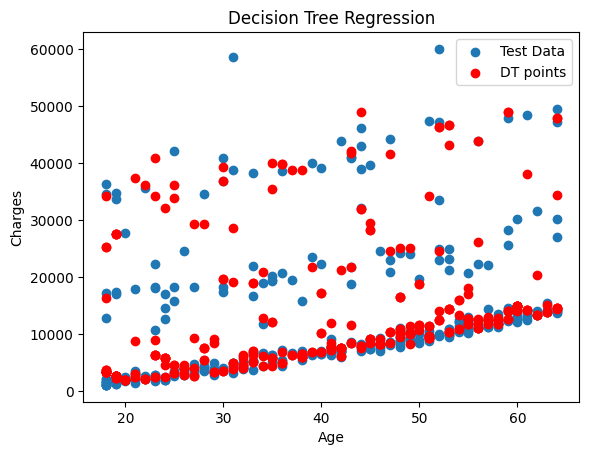

In [ ]:
plt.scatter(X_test_3['age'], y_test_3, label='Test Data')
plt.scatter(X_test_3['age'], DT_y_pred_3, color='red', linewidth=1, label='DT points')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

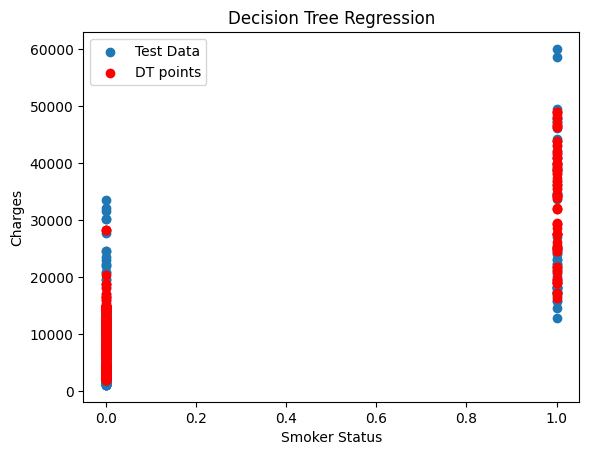

In [ ]:
plt.scatter(X_test_3['smoker_yes'], y_test_3, label='Test Data')
plt.scatter(X_test_3['smoker_yes'], DT_y_pred_3, color='red', linewidth=1, label='DT points')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    DT_X_train_3, DT_X_test_3, DT_y_train_3, DT_y_test_3 = train_test_split(X_4, y_4, test_size=ratio, random_state=1)
    Dt_model_3 = DecisionTreeRegressor()
    Dt_model_3.fit(DT_X_train_3, DT_y_train_3)
    Dt_y_pred_3 = Dt_model_3.predict(DT_X_test_3)
    Dt_rmse_3 = np.sqrt(metrics.mean_squared_error(DT_y_test_3, Dt_y_pred_3))
    Dt_R2_3 = r2_score(DT_y_test_3, Dt_y_pred_3)
    print(f"Split Ratio: {ratio}, RMSE: {Dt_rmse_3}, R Score: {Dt_R2_3}")


Split Ratio: 0.1, RMSE: 9453.636783278687, R Score: 0.4344441759147606
Split Ratio: 0.2, RMSE: 8254.34038833642, R Score: 0.5435835790598628
Split Ratio: 0.3, RMSE: 8317.444202986031, R Score: 0.5118437608991251
Split Ratio: 0.4, RMSE: 8417.395367002275, R Score: 0.5070705543389603


In [ ]:
#R Squared values:

print(f"Model 1: {(r2_score(y_test,DT_y_pred))}")
print(f"Model 2: {(r2_score(y_test_1,DT_y_pred_1))}")
print(f"Model 3: {(r2_score(y_test_2,DT_y_pred_2))}")
print(f"Model 4: {(r2_score(y_test_3,DT_y_pred_3))}")

Model 1: 0.6604425404213328
Model 2: 0.36010704454764486
Model 3: 0.6566390279584046
Model 4: 0.5105547178922027


#RANDOM FOREST REGRESSOR ALGORITHM

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
RF_y_pred = rf.predict(X_test)
RF_y_pred

array([ 1879.7733835 , 12192.0872003 ,  9187.9298866 , 11059.6690133 ,
        2067.747822  , 40011.1553402 , 10730.3512142 , 11654.5016325 ,
        3124.017632  , 20116.0451127 , 17776.9283678 , 13884.1207318 ,
        6784.18084   ,  7284.7830483 ,  2230.240814  , 12009.9675988 ,
        6251.5107336 ,  7333.5325532 , 16216.2556748 , 13675.6226848 ,
        9515.019639  , 41316.3043612 , 12465.8629475 , 13612.6249612 ,
       14833.46472526,  6719.3685565 ,  8575.2307821 ,  9996.6402223 ,
        7885.3254153 ,  3672.877692  , 12421.8567794 ,  7441.7778876 ,
       25166.3759225 , 35179.0606756 , 26129.3363955 , 14493.7233588 ,
       39491.4926932 , 17321.1810833 , 16032.5383192 , 45550.9190387 ,
        6603.9077536 , 11925.678125  , 11394.8668511 , 18621.8795525 ,
        5540.9708351 , 13003.3434969 ,  1818.417561  , 37666.5065036 ,
       10981.5197458 , 16448.0137183 , 17712.6236262 , 15110.1295753 ,
        5242.8023242 , 11756.4363891 , 16562.94022   ,  6417.8292161 ,
      

In [ ]:
rfr = pd.DataFrame({'Predicted':RF_y_pred,'Actual':y_test})
rfr

,Predicted,Actual
559,1879.773384,1646.42970
1087,12192.087200,11353.22760
1020,9187.929887,8798.59300
460,11059.669013,10381.47870
802,2067.747822,2103.08000
...,...,...
1192,12573.472090,13019.16105
628,15104.288253,11365.95200
1098,10654.374207,23045.56616
1038,2319.126492,2250.83520


In [ ]:
r2_score(y_test,RF_y_pred)

0.8196146458965754

In [ ]:
metrics.mean_absolute_error(y_test,RF_y_pred)

2773.4246761231348

In [ ]:
mean_squared_error(y_test,RF_y_pred)

24264614.02562702

In [ ]:
RF_mse = mean_squared_error(y_test, RF_y_pred)
RF_rmse = np.sqrt(RF_mse)
RF_rmse

4925.912506899307

In [ ]:
RF_mape = mean_absolute_percentage_error(y_test, RF_y_pred)
print(RF_mape)
RF_mape = RF_mape * 100
RF_mape

0.33329260267816646


33.32926026781664

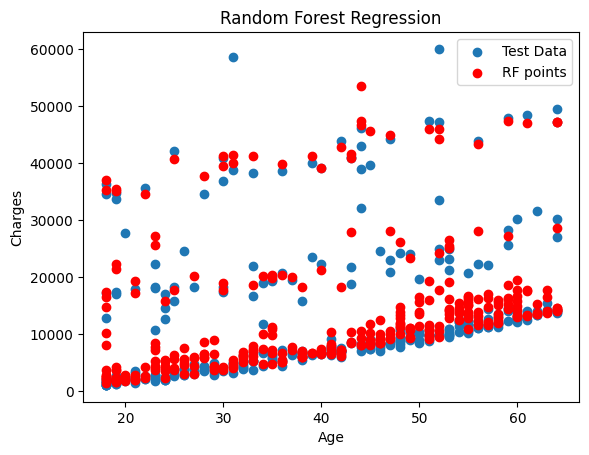

In [ ]:
plt.scatter(X_test['age'], y_test, label='Test Data')
plt.scatter(X_test['age'], RF_y_pred, color='red', linewidth=1, label='RF points')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

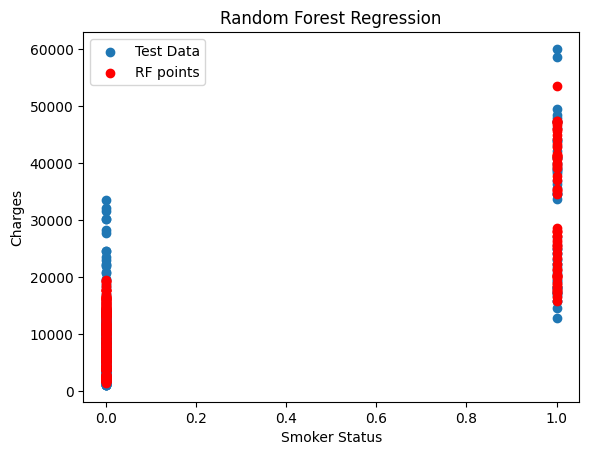

In [ ]:
plt.scatter(X_test['smoker_yes'], y_test, label='Test Data')
plt.scatter(X_test['smoker_yes'], RF_y_pred, color='red', linewidth=1, label='RF points')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    RF_X_train, RF_X_test, RF_y_train, RF_y_test = train_test_split(X_1, y_1, test_size=ratio, random_state=1)
    rf_model = RandomForestRegressor()
    rf_model.fit(RF_X_train, RF_y_train)
    Rf_y_pred = rf_model.predict(RF_X_test)
    RF_rmse = np.sqrt(metrics.mean_squared_error(RF_y_test, Rf_y_pred))
    RF_R2 = r2_score(RF_y_test, Rf_y_pred)
    print(f"Split Ratio: {ratio}, RMSE: {RF_rmse}, R Score: {RF_R2}")


Split Ratio: 0.1, RMSE: 5028.521096300179, R Score: 0.83998591686263
Split Ratio: 0.2, RMSE: 4775.070116721695, R Score: 0.8472588630437694
Split Ratio: 0.3, RMSE: 4922.838323210777, R Score: 0.8289944531056772
Split Ratio: 0.4, RMSE: 4980.65709829142, R Score: 0.827415179616974


Random Forest Tree - Regressor Algorithm after removing Multicolinearity:

In [ ]:
rf.fit(X_train_1, y_train_1)

RandomForestRegressor()

In [ ]:
RF_y_pred_1 = rf.predict(X_test_1)
RF_y_pred_1

array([ 1654.85479824, 13009.40285648,  9064.6255436 , 10795.95784765,
        2175.31948494, 22076.708976  , 10916.65323578, 11604.09719761,
        3662.91580837, 38881.9978614 , 14491.68286222, 12904.47655523,
        6479.63222558,  7542.04029213,  1146.62849085, 11880.43749973,
        8516.8638505 ,  8596.8094558 , 16187.5713891 , 13425.28379075,
       10049.47012653, 20524.12956   ,  9201.55083023,  8688.15292364,
        4246.55852924,  6640.61890915, 10540.5486408 ,  9453.62992702,
        7979.95137928,  3947.9773799 , 16806.81925584, 16503.85393332,
       44672.9980306 , 25771.75729343, 37273.07498725, 14603.43832321,
       35796.1300725 , 32284.4429305 , 17331.02241196, 24860.10143663,
        6624.9997244 , 11825.33596987, 11144.0536988 , 14483.6785359 ,
        5632.6662155 , 12794.50719729,  2327.10278487, 33905.2992887 ,
       10745.4963122 , 16922.07378483, 16722.8165576 , 19739.1865195 ,
        7025.50603095,  8891.05815417, 20845.24475022,  4569.58127426,
      

In [ ]:
rfr_1 = pd.DataFrame({'Predicted':RF_y_pred_1,'Actual':y_test_1})
rfr_1

,Predicted,Actual
559,1654.854798,1646.42970
1087,13009.402856,11353.22760
1020,9064.625544,8798.59300
460,10795.957848,10381.47870
802,2175.319485,2103.08000
...,...,...
1192,13399.502470,13019.16105
628,11380.620041,11365.95200
1098,11379.305865,23045.56616
1038,2212.830837,2250.83520


In [ ]:
r2_score(y_test_1,RF_y_pred_1)

0.550353947545802

In [ ]:
metrics.mean_absolute_error(y_test_1,RF_y_pred_1)

4463.611489763639

In [ ]:
mean_squared_error(y_test_1,RF_y_pred_1)

60484333.47139917

In [ ]:
RF_mse_1 = mean_squared_error(y_test_1, RF_y_pred_1)
RF_rmse_1 = np.sqrt(RF_mse_1)
RF_rmse_1

7777.16744524632

In [ ]:
RF_mape_1 = mean_absolute_percentage_error(y_test_1, RF_y_pred_1)
print(RF_mape_1)
RF_mape_1 = RF_mape_1 * 100
RF_mape_1

0.355164704222602


35.5164704222602

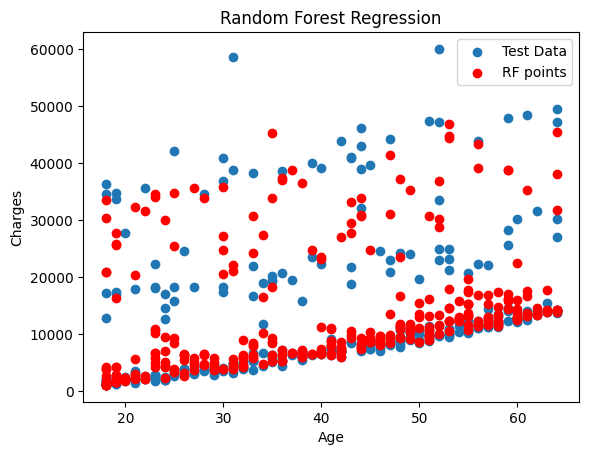

In [ ]:
plt.scatter(X_test_1['age'], y_test_1, label='Test Data')
plt.scatter(X_test_1['age'], RF_y_pred_1, color='red', linewidth=1, label='RF points')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

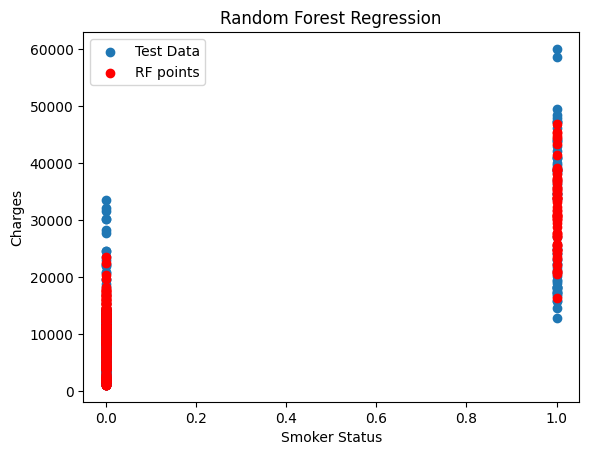

In [ ]:
plt.scatter(X_test_1['smoker_yes'], y_test_1, label='Test Data')
plt.scatter(X_test_1['smoker_yes'], RF_y_pred_1, color='red', linewidth=1, label='RF points')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    RF_X_train_1, RF_X_test_1, RF_y_train_1, RF_y_test_1 = train_test_split(X_2, y_2, test_size=ratio, random_state=1)
    rf_model_1 = RandomForestRegressor()
    rf_model_1.fit(RF_X_train_1, RF_y_train_1)
    Rf_y_pred_1 = rf_model_1.predict(RF_X_test_1)
    RF_rmse_1 = np.sqrt(metrics.mean_squared_error(RF_y_test_1, Rf_y_pred_1))
    RF_R2_1 = r2_score(RF_y_test_1, Rf_y_pred_1)
    print(f"Split Ratio: {ratio}, RMSE: {RF_rmse_1}, R Score: {RF_R2_1}")


Split Ratio: 0.1, RMSE: 8595.997867978624, R Score: 0.5324045757234783
Split Ratio: 0.2, RMSE: 7729.885225351116, R Score: 0.5997396195974201
Split Ratio: 0.3, RMSE: 7852.984623349784, R Score: 0.564840422622455
Split Ratio: 0.4, RMSE: 7387.5224024693725, R Score: 0.620311948360063


Random Forest Regressor Model after removing Insignificance:

In [ ]:
rf.fit(X_train_2, y_train_2)

RandomForestRegressor()

In [ ]:
RF_y_pred_2 = rf.predict(X_test_2)
RF_y_pred_2

array([ 1595.638588  , 13233.2803822 ,  9433.1098112 , 12191.6073591 ,
        2920.5835706 , 38315.3019746 , 11413.1576376 , 11612.228091  ,
        3506.8443699 , 19985.252068  , 13402.5008169 , 12728.7684975 ,
        6949.7667925 ,  7074.398466  ,  2902.494142  , 10486.287675  ,
        5676.8671008 ,  6816.9189852 , 16990.5990722 , 13612.556705  ,
        9527.304654  , 40819.0058924 , 10828.9441525 , 10052.5546949 ,
       14704.88309107,  6978.487023  ,  8861.289467  ,  8911.8994508 ,
        8342.1768883 ,  3632.4798655 , 11269.4876755 ,  6851.4465431 ,
       24369.5325757 , 34947.7929905 , 26114.7864613 , 16811.3074819 ,
       40649.5894973 , 17525.6671646 , 15938.9981618 , 45946.8195145 ,
        7472.9252224 , 11988.582957  , 11786.8397102 , 17961.2350601 ,
        6096.3069191 , 12662.420091  ,  1931.6076545 , 37348.3871006 ,
        9221.7084635 , 16458.7927086 , 14830.78797   , 13442.8893143 ,
        7911.5806117 ,  9272.19504   , 16870.932908  ,  6959.6787925 ,
      

In [ ]:
rfr_2 = pd.DataFrame({'Predicted':RF_y_pred_2,'Actual':y_test_2})
rfr_2

,Predicted,Actual
559,1595.638588,1646.42970
1087,13233.280382,11353.22760
1020,9433.109811,8798.59300
460,12191.607359,10381.47870
802,2920.583571,2103.08000
...,...,...
1192,12429.609859,13019.16105
628,14490.750669,11365.95200
1098,10419.952016,23045.56616
1038,2259.743984,2250.83520


In [ ]:
r2_score(y_test_2,RF_y_pred_2)

0.8136348365710029

In [ ]:
metrics.mean_absolute_error(y_test_2,RF_y_pred_2)

2808.8206911920606

In [ ]:
mean_squared_error(y_test_2,RF_y_pred_2)

25068990.666696623

In [ ]:
RF_mse_2 = mean_squared_error(y_test_2, RF_y_pred_2)
RF_rmse_2 = np.sqrt(RF_mse_2)
RF_rmse_2

5006.89431351378

In [ ]:
RF_mape_2 = mean_absolute_percentage_error(y_test_2, RF_y_pred_2)
print(RF_mape_2)
RF_mape_2 = RF_mape_2 * 100
RF_mape_2

0.36560884441940145


36.560884441940146

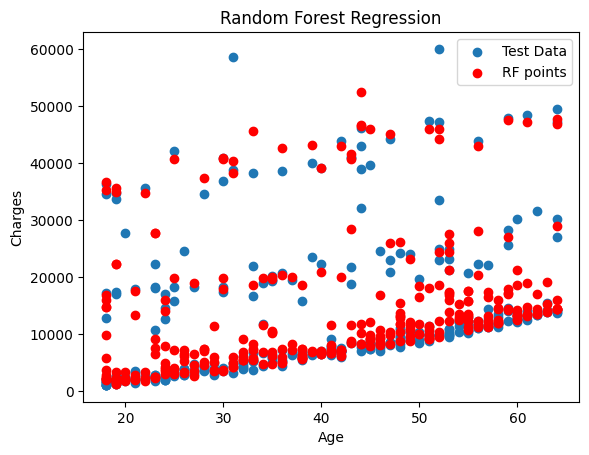

In [ ]:
plt.scatter(X_test_2['age'], y_test_2, label='Test Data')
plt.scatter(X_test_2['age'], RF_y_pred_2, color='red', linewidth=1, label='RF points')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

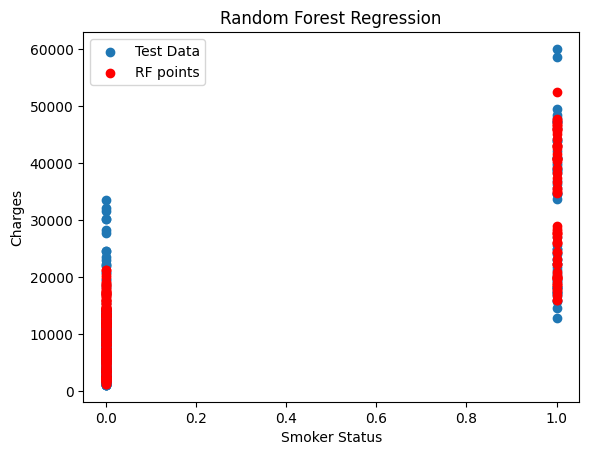

In [ ]:
plt.scatter(X_test_2['smoker_yes'], y_test_2, label='Test Data')
plt.scatter(X_test_2['smoker_yes'], RF_y_pred_2, color='red', linewidth=1, label='RF points')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    RF_X_train_2, RF_X_test_2, RF_y_train_2, RF_y_test_2 = train_test_split(X_3, y_3, test_size=ratio, random_state=1)
    rf_model_2 = RandomForestRegressor()
    rf_model_2.fit(RF_X_train_2, RF_y_train_2)
    Rf_y_pred_2 = rf_model_2.predict(RF_X_test_2)
    RF_rmse_2 = np.sqrt(metrics.mean_squared_error(RF_y_test_2, Rf_y_pred_2))
    RF_R2_2 = r2_score(RF_y_test_2, Rf_y_pred_2)
    print(f"Split Ratio: {ratio}, RMSE: {RF_rmse_2}, R Score: {RF_R2_2}")


Split Ratio: 0.1, RMSE: 5139.708313393027, R Score: 0.8328314405388985
Split Ratio: 0.2, RMSE: 4791.276908793611, R Score: 0.8462202836436863
Split Ratio: 0.3, RMSE: 5014.806461486557, R Score: 0.8225453411495971
Split Ratio: 0.4, RMSE: 5116.405419288728, R Score: 0.8178793425742332


Random Forest Regressor Model after removing Multicollinearity and then Insignificance:

In [ ]:
rf.fit(X_train_3, y_train_3)

RandomForestRegressor()

In [ ]:
RF_y_pred_3 = rf.predict(X_test_3)
RF_y_pred_3

array([ 2490.90294613, 12596.6620595 ,  9299.1532433 , 10279.28932769,
        2663.51226647, 20353.33822577, 10472.98625678, 11025.05013462,
        2758.56933699, 37965.30931792, 15329.77924209, 12560.8056808 ,
        6892.65853328,  7589.51600203,  3412.6177474 , 10723.79389323,
        7305.31940392,  7027.91043766, 12928.31647146, 13286.15191782,
       12186.34024062, 20420.26655098,  8616.94747704, 11135.23198308,
        3412.6177474 ,  7895.27848791,  9386.86436065, 10288.78807537,
        5532.89335146,  3584.03125041, 12033.28414751, 12106.39908512,
       43326.8585786 , 28065.53224279, 32555.09286681, 14248.62183334,
       31588.32130402, 32785.32694583, 12591.43852561, 33256.94894412,
        7365.69438631, 12591.43852561, 11467.05968121, 12928.31647146,
        4953.79467482, 15329.77924209,  2011.54340481, 35969.31498292,
        9299.1532433 , 14661.45648899, 14248.19057519, 13410.1164582 ,
        5331.46259053,  9114.31771655, 19330.05197666,  4182.15441665,
      

In [ ]:
rfr_3 = pd.DataFrame({'Predicted':RF_y_pred_3,'Actual':y_test_3})
rfr_3

,Predicted,Actual
559,2490.902946,1646.42970
1087,12596.662059,11353.22760
1020,9299.153243,8798.59300
460,10279.289328,10381.47870
802,2663.512266,2103.08000
...,...,...
1192,12116.906036,13019.16105
628,12591.438526,11365.95200
1098,12186.340241,23045.56616
1038,2156.115661,2250.83520


In [ ]:
r2_score(y_test_3,RF_y_pred_3)

0.5635904894981005

In [ ]:
metrics.mean_absolute_error(y_test_3,RF_y_pred_3)

4380.259712697546

In [ ]:
mean_squared_error(y_test_3,RF_y_pred_3)

58703814.298415795

In [ ]:
RF_mse_3 = mean_squared_error(y_test_3, RF_y_pred_3)
RF_rmse_3 = np.sqrt(RF_mse_3)
RF_rmse_3

7661.841443048518

In [ ]:
RF_mape_3 = mean_absolute_percentage_error(y_test_3, RF_y_pred_3)
print(RF_mape_3)
RF_mape_3 = RF_mape_3 * 100
RF_mape_3

0.3692953636528675


36.92953636528675

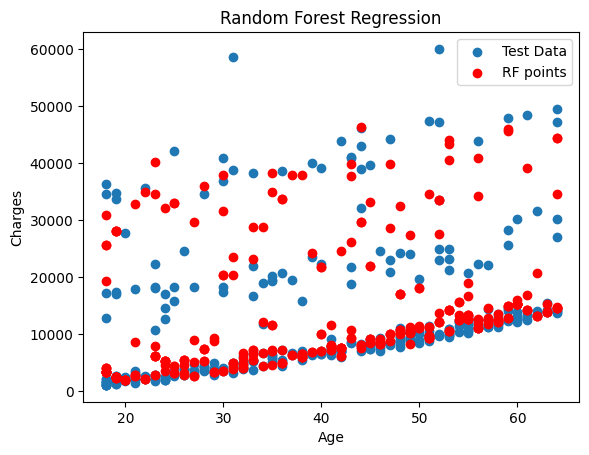

In [ ]:
plt.scatter(X_test_3['age'], y_test_3, label='Test Data')
plt.scatter(X_test_3['age'], RF_y_pred_3, color='red', linewidth=1, label='RF points')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

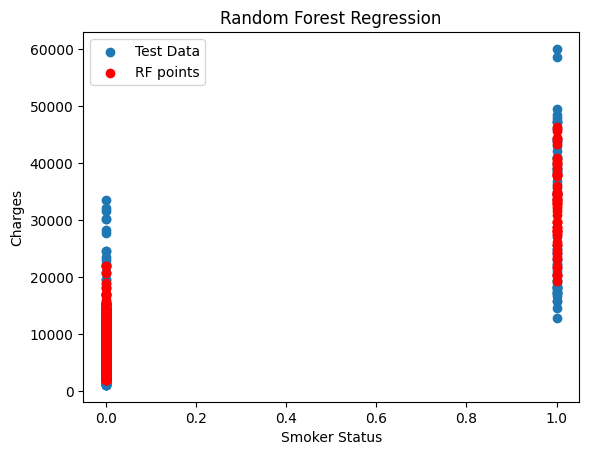

In [ ]:
plt.scatter(X_test_3['smoker_yes'], y_test_3, label='Test Data')
plt.scatter(X_test_3['smoker_yes'], RF_y_pred_3, color='red', linewidth=1, label='RF points')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    RF_X_train_3, RF_X_test_3, RF_y_train_3, RF_y_test_3 = train_test_split(X_4, y_4, test_size=ratio, random_state=1)
    rf_model_3 = RandomForestRegressor()
    rf_model_3.fit(RF_X_train_3, RF_y_train_3)
    Rf_y_pred_3 = rf_model_3.predict(RF_X_test_3)
    RF_rmse_3 = np.sqrt(metrics.mean_squared_error(RF_y_test_3, Rf_y_pred_3))
    RF_R2_3 = r2_score(RF_y_test_3, Rf_y_pred_3)
    print(f"Split Ratio: {ratio}, RMSE: {RF_rmse_3}, R Score: {RF_R2_3}")


Split Ratio: 0.1, RMSE: 8674.629488778766, R Score: 0.5238108201777675
Split Ratio: 0.2, RMSE: 7669.698823602392, R Score: 0.6059483654518991
Split Ratio: 0.3, RMSE: 7621.201879151114, R Score: 0.5901490143211483
Split Ratio: 0.4, RMSE: 7608.5365793404235, R Score: 0.5972536857540995


In [ ]:
#R Squared values:

print(f"Model 1: {(r2_score(y_test,RF_y_pred))}")
print(f"Model 2: {(r2_score(y_test_1,RF_y_pred_1))}")
print(f"Model 3: {(r2_score(y_test_2,RF_y_pred_2))}")
print(f"Model 4: {(r2_score(y_test_3,RF_y_pred_3))}")

Model 1: 0.8196146458965754
Model 2: 0.550353947545802
Model 3: 0.8136348365710029
Model 4: 0.5635904894981005


#BAGGING ALGORITHM

In [ ]:
base_model = DecisionTreeRegressor(max_features = "sqrt")
model_BA = BaggingRegressor(base_model, n_estimators = 100, random_state = 1)
BA = model_BA.fit(X_train, y_train)
BA_y_pred = model_BA.predict(X_test)
BA_y_pred

array([ 3483.5742653 , 11432.8886024 , 10137.8247349 , 12654.7695144 ,
        3582.366873  , 32396.4743937 ,  9792.1435105 , 12081.3176478 ,
        3008.160187  , 21492.8266654 , 19165.9900755 , 13941.1696798 ,
        7124.1454178 ,  7188.4936186 ,  2267.712572  , 10036.8297912 ,
        5303.9797156 ,  8103.0394727 , 13505.935945  , 12363.5557605 ,
       10955.733424  , 32948.0094978 , 13173.1624877 , 11650.8189419 ,
       15016.32161183,  6151.131545  , 10202.1228439 , 12238.385103  ,
        8460.6090138 ,  4233.2481596 , 14051.2810755 ,  7704.0104802 ,
       25480.8698782 , 31977.8340195 , 25902.3808762 , 13421.8120774 ,
       36188.2020326 , 20209.1764076 , 14645.4301906 , 35763.9498856 ,
        4194.6471055 , 13297.9962492 , 11709.0755126 , 15123.9814306 ,
        4995.6984646 , 12132.2050045 ,  2693.0194272 , 33765.6708639 ,
       10017.6224451 , 14297.7031439 , 18419.5633415 , 13602.1339654 ,
        5492.4152356 ,  9110.2093492 , 18241.4241709 ,  7576.6260489 ,
      

In [ ]:
BaR = pd.DataFrame({'Predicted':BA_y_pred,'Actual':y_test})
BaR

,Predicted,Actual
559,3483.574265,1646.42970
1087,11432.888602,11353.22760
1020,10137.824735,8798.59300
460,12654.769514,10381.47870
802,3582.366873,2103.08000
...,...,...
1192,12877.348316,13019.16105
628,16709.911879,11365.95200
1098,12051.339358,23045.56616
1038,3314.514580,2250.83520


In [ ]:
r2_score(y_test,BA_y_pred)

0.8181018584358947

In [ ]:
metrics.mean_absolute_error(y_test,BA_y_pred)

2980.0407953655217

In [ ]:
mean_squared_error(y_test,BA_y_pred)

24468107.286034297

In [ ]:
BA_mse = mean_squared_error(y_test, BA_y_pred)
BA_rmse = np.sqrt(BA_mse)
BA_rmse

4946.524768565735

In [ ]:
BA_mape = mean_absolute_percentage_error(y_test, BA_y_pred)
print(BA_mape)
BA_mape = BA_mape * 100
BA_mape

0.37310195672008944


37.310195672008945

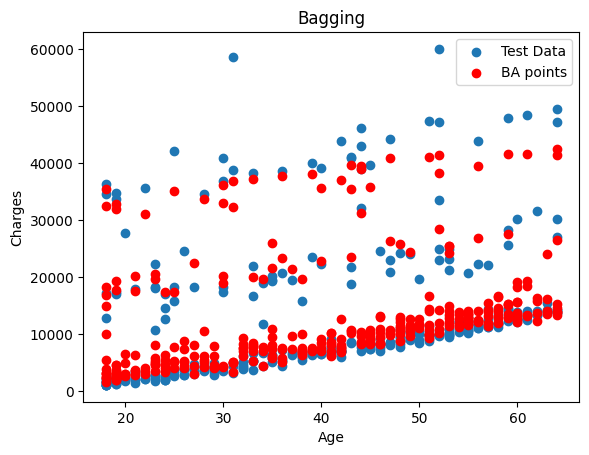

In [ ]:
plt.scatter(X_test['age'], y_test, label='Test Data')
plt.scatter(X_test['age'], BA_y_pred, color='red', linewidth=1, label='BA points')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Bagging')
plt.legend()
plt.show()

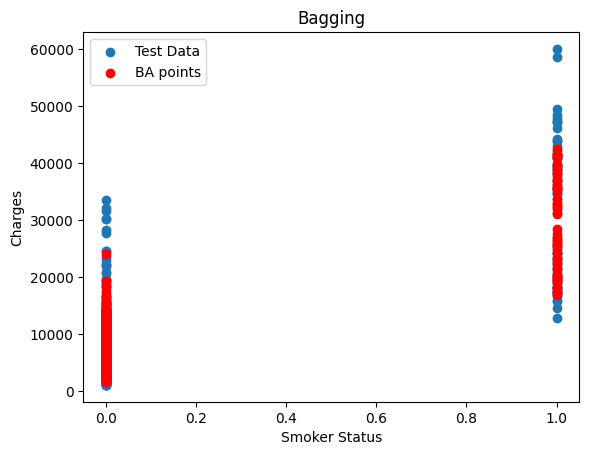

In [ ]:
plt.scatter(X_test['smoker_yes'], y_test, label='Test Data')
plt.scatter(X_test['smoker_yes'], BA_y_pred, color='red', linewidth=1, label='BA points')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.title('Bagging')
plt.legend()
plt.show()

In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    BA_X_train, BA_X_test, BA_y_train, BA_y_test = train_test_split(X_1, y_1, test_size=ratio, random_state=1)
    ba_model = BaggingRegressor(base_model, n_estimators = 100, random_state = 1)
    ba_model.fit(BA_X_train, BA_y_train)
    Ba_y_pred = ba_model.predict(BA_X_test)
    BA_rmse = np.sqrt(metrics.mean_squared_error(BA_y_test, Ba_y_pred))
    BA_R2 = r2_score(BA_y_test, Ba_y_pred)
    print(f"Split Ratio: {ratio}, RMSE: {BA_rmse}, R Score: {BA_R2}")


Split Ratio: 0.1, RMSE: 5372.009777619054, R Score: 0.8173787784809341
Split Ratio: 0.2, RMSE: 4861.8368206137375, R Score: 0.8416575831132266
Split Ratio: 0.3, RMSE: 4931.724618671245, R Score: 0.8283765261099899
Split Ratio: 0.4, RMSE: 5154.695686443478, R Score: 0.815143225289713


Bagging Algorithm after removing Multicolinearity:

In [ ]:
base_model_1 = DecisionTreeRegressor(max_features = "sqrt")
model_BA_1 = BaggingRegressor(base_model_1, n_estimators = 100, random_state = 1)
BA_1 = model_BA_1.fit(X_train_1, y_train_1)
BA_y_pred_1 = model_BA_1.predict(X_test_1)
BA_y_pred_1

array([ 1646.74821471, 11319.76881162,  8726.47321   , 10938.1012671 ,
        2003.05408388, 24184.4315796 ,  9029.91131042, 11621.38892207,
        3332.35157736, 38749.2190516 , 15183.62464387, 12497.3510253 ,
        6307.55403332,  7231.16938487,  1162.85986777, 10279.1814738 ,
        4797.89070018,  6987.31775807, 14037.80875298, 13407.65885867,
        9580.72934917, 20978.2775225 ,  8468.49608205,  8842.7330126 ,
        4468.78698975,  6829.92510522,  9127.2058717 ,  8828.2938278 ,
        5582.02415707,  4650.0033852 , 23307.62113957,  8646.1304005 ,
       41296.3213823 , 26225.29528226, 32745.10472793, 15105.01012405,
       34779.5864012 , 25615.674504  , 16790.59724718, 23716.58848944,
        4513.8277196 , 11842.21601518, 11684.02629915, 13309.762454  ,
        5747.2044503 , 12791.7780764 ,  2791.35615071, 31915.3556545 ,
       10045.11937117, 15262.77405045, 15726.07415483, 17411.76140933,
       13025.10187392,  8800.0435625 , 26373.25952582,  4400.39132151,
      

In [ ]:
BaR_1 = pd.DataFrame({'Predicted':BA_y_pred_1,'Actual':y_test_1})
BaR_1

,Predicted,Actual
559,1646.748215,1646.42970
1087,11319.768812,11353.22760
1020,8726.473210,8798.59300
460,10938.101267,10381.47870
802,2003.054084,2103.08000
...,...,...
1192,11968.479826,13019.16105
628,11524.575698,11365.95200
1098,10465.659300,23045.56616
1038,2261.838731,2250.83520


In [ ]:
r2_score(y_test_1,BA_y_pred_1)

0.584290429626773

In [ ]:
metrics.mean_absolute_error(y_test_1,BA_y_pred_1)

4214.588374868601

In [ ]:
mean_squared_error(y_test_1,BA_y_pred_1)

55919352.887608334

In [ ]:
BA_mse_1 = mean_squared_error(y_test_1, BA_y_pred_1)
BA_rmse_1 = np.sqrt(BA_mse_1)
BA_rmse_1

7477.924370278716

In [ ]:
BA_mape_1 = mean_absolute_percentage_error(y_test_1, BA_y_pred_1)
print(BA_mape_1)
BA_mape_1 = BA_mape_1 * 100
BA_mape_1

0.3196971750479656


31.969717504796556

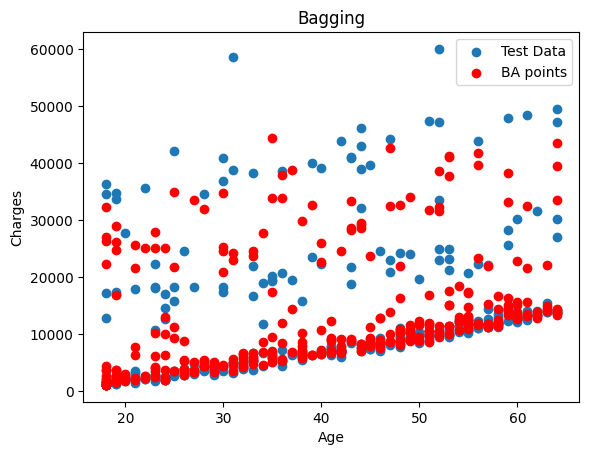

In [ ]:
plt.scatter(X_test_1['age'], y_test_1, label='Test Data')
plt.scatter(X_test_1['age'], BA_y_pred_1, color='red', linewidth=1, label='BA points')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Bagging')
plt.legend()
plt.show()

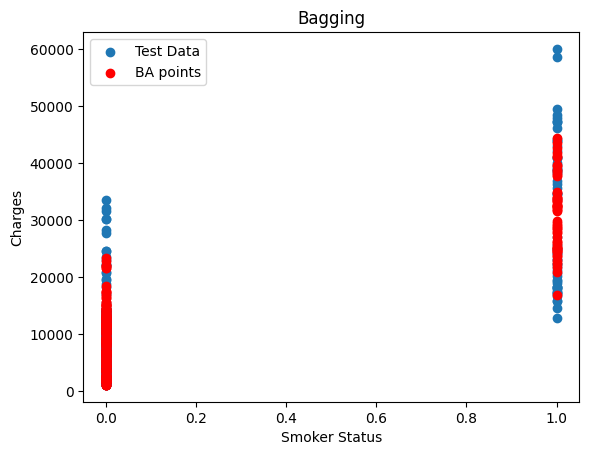

In [ ]:
plt.scatter(X_test_1['smoker_yes'], y_test_1, label='Test Data')
plt.scatter(X_test_1['smoker_yes'], BA_y_pred_1, color='red', linewidth=1, label='BA points')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.title('Bagging')
plt.legend()
plt.show()

In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    BA_X_train_1, BA_X_test_1, BA_y_train_1, BA_y_test_1 = train_test_split(X_2, y_2, test_size=ratio, random_state=1)
    ba_model_1 = BaggingRegressor(base_model_1, n_estimators = 100, random_state = 1)
    ba_model_1.fit(BA_X_train_1, BA_y_train_1)
    Ba_y_pred_1 = ba_model_1.predict(BA_X_test_1)
    BA_rmse_1 = np.sqrt(metrics.mean_squared_error(BA_y_test_1, Ba_y_pred_1))
    BA_R2_1 = r2_score(BA_y_test_1, Ba_y_pred_1)
    print(f"Split Ratio: {ratio}, RMSE: {BA_rmse_1}, R Score: {BA_R2_1}")


Split Ratio: 0.1, RMSE: 8347.838718404628, R Score: 0.5590130333325771
Split Ratio: 0.2, RMSE: 7416.43207531891, R Score: 0.6315432136983077
Split Ratio: 0.3, RMSE: 7861.637958207691, R Score: 0.5638808750366742
Split Ratio: 0.4, RMSE: 7510.15104955507, R Score: 0.6076021196888879


Bagging Algorithm after removing Insignificane:

In [ ]:
base_model_2 = DecisionTreeRegressor(max_features = "sqrt")
model_BA_2 = BaggingRegressor(base_model_2, n_estimators = 100, random_state = 1)
BA_2 = model_BA_2.fit(X_train_2, y_train_2)
BA_y_pred_2 = model_BA_2.predict(X_test_2)
BA_y_pred_2

array([ 1420.4988995 , 11833.1966622 ,  9698.6973262 , 11795.8502667 ,
        3026.9504491 , 37815.5235673 , 11642.3041169 , 11612.3280985 ,
        3286.8590545 , 19953.1225805 , 14670.47011   , 13586.3651744 ,
        7030.0189566 ,  7193.1460132 ,  3163.357834  , 10756.1108153 ,
        5460.3868803 ,  6805.0712125 , 16008.530359  , 13580.3766355 ,
       10095.5916513 , 40651.5311868 , 10219.3797436 , 10799.8667765 ,
       14795.29776533,  6899.151161  ,  8499.1519963 ,  9371.3384336 ,
        6754.0702847 ,  3672.663889  , 11485.2176677 ,  6987.1200476 ,
       24341.9622283 , 34942.0049927 , 24445.4711295 , 15313.5480373 ,
       39730.2617643 , 18435.0800351 , 16921.934704  , 44551.2343968 ,
        6554.3297905 , 11891.6197915 , 12501.6926438 , 16682.9093976 ,
        6376.0101688 , 12625.169414  ,  2436.348637  , 36223.7184142 ,
        9280.0398658 , 15075.2929851 , 14433.0303865 , 13843.8109291 ,
       10421.5738096 ,  9158.1153824 , 16896.691782  ,  6701.9131034 ,
      

In [ ]:
BaR_2 = pd.DataFrame({'Predicted':BA_y_pred_2,'Actual':y_test_2})
BaR_2

,Predicted,Actual
559,1420.498899,1646.42970
1087,11833.196662,11353.22760
1020,9698.697326,8798.59300
460,11795.850267,10381.47870
802,3026.950449,2103.08000
...,...,...
1192,12186.461083,13019.16105
628,16425.201390,11365.95200
1098,9920.552067,23045.56616
1038,2306.779008,2250.83520


In [ ]:
r2_score(y_test_2,BA_y_pred_2)

0.8216046893625825

In [ ]:
metrics.mean_absolute_error(y_test_2,BA_y_pred_2)

2752.6138653964786

In [ ]:
mean_squared_error(y_test_2,BA_y_pred_2)

23996922.46698088

In [ ]:
BA_mse_2 = mean_squared_error(y_test_2, BA_y_pred_2)
BA_rmse_2 = np.sqrt(BA_mse_2)
BA_rmse_2

4898.665376097951

In [ ]:
BA_mape_2 = mean_absolute_percentage_error(y_test_2, BA_y_pred_2)
print(BA_mape_2)
BA_mape_2 = BA_mape_2 * 100
BA_mape_2

0.3855769107719923


38.55769107719923

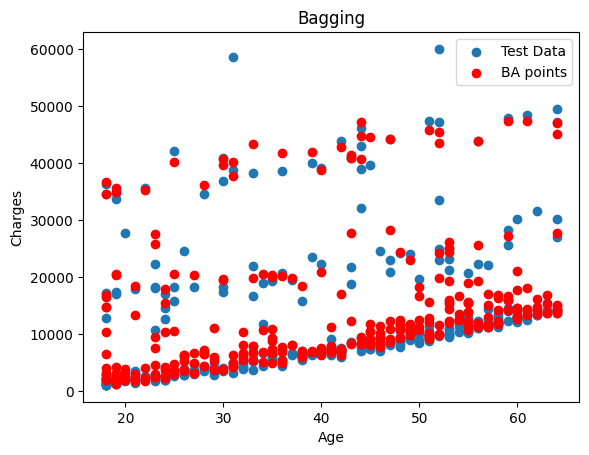

In [ ]:
plt.scatter(X_test_2['age'], y_test_2, label='Test Data')
plt.scatter(X_test_2['age'], BA_y_pred_2, color='red', linewidth=1, label='BA points')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Bagging')
plt.legend()
plt.show()

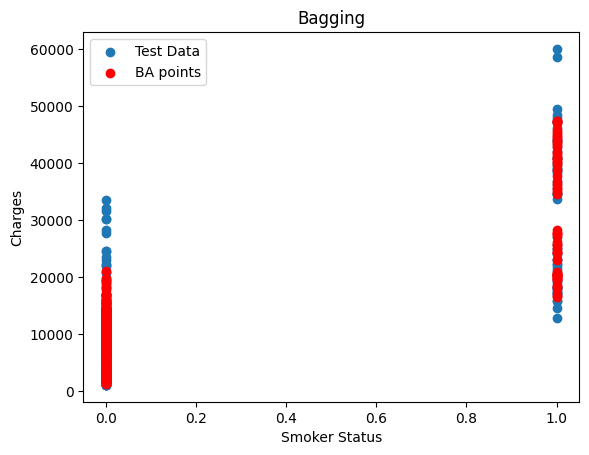

In [ ]:
plt.scatter(X_test_2['smoker_yes'], y_test_2, label='Test Data')
plt.scatter(X_test_2['smoker_yes'], BA_y_pred_2, color='red', linewidth=1, label='BA points')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.title('Bagging')
plt.legend()
plt.show()

In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    BA_X_train_2, BA_X_test_2, BA_y_train_2, BA_y_test_2 = train_test_split(X_3, y_3, test_size=ratio, random_state=1)
    ba_model_2 = BaggingRegressor(base_model_2, n_estimators = 100, random_state = 1)
    ba_model_2.fit(BA_X_train_2, BA_y_train_2)
    Ba_y_pred_2 = ba_model_2.predict(BA_X_test_2)
    BA_rmse_2 = np.sqrt(metrics.mean_squared_error(BA_y_test_2, Ba_y_pred_2))
    BA_R2_2 = r2_score(BA_y_test_2, Ba_y_pred_2)
    print(f"Split Ratio: {ratio}, RMSE: {BA_rmse_2}, R Score: {BA_R2_2}")


Split Ratio: 0.1, RMSE: 5088.654862836123, R Score: 0.8361359644188047
Split Ratio: 0.2, RMSE: 4644.010509729831, R Score: 0.8555282609265169
Split Ratio: 0.3, RMSE: 4854.19199370746, R Score: 0.8337303619502565
Split Ratio: 0.4, RMSE: 4928.127514647064, R Score: 0.8310363891553576


Bagging Algorithm after removing Multicolinearity and then Insignificance:

In [ ]:
base_model_3 = DecisionTreeRegressor(max_features = "sqrt")
model_BA_3 = BaggingRegressor(base_model_3, n_estimators = 100, random_state = 1)
BA_3 = model_BA_3.fit(X_train_3, y_train_3)
BA_y_pred_3 = model_BA_3.predict(X_test_3)
BA_y_pred_3

array([ 2614.22360728, 12514.11663439,  9403.9891769 , 10286.81965485,
        2514.41719764, 19682.43924995, 10148.28212629, 11036.79675545,
        2740.00376429, 38111.07284767, 14858.12819437, 12213.96208282,
        6830.27999694,  7574.95898894,  3414.64126017,  9645.36380332,
        7315.44033031,  6600.65690231, 13359.77364234, 13315.94547619,
       12386.58960337, 20266.24406687,  9275.00657516, 11084.91772819,
        3414.64126017,  7788.56886001,  9007.96884236, 10564.58723941,
        5042.26060982,  3532.47423042, 12070.56089732, 12890.71562742,
       42060.42335898, 27620.75991768, 28644.46354916, 14623.55681386,
       31737.30951058, 28945.84844175, 12493.01612769, 31486.53713482,
        7660.35350657, 12493.01612769, 10768.61357476, 13359.77364234,
        4931.61655013, 14858.12819437,  2014.38825178, 30761.08237017,
        9403.9891769 , 18553.35927515, 14230.99262741, 12228.02074598,
        5940.602969  ,  9129.02435826, 18364.41209419,  4119.90004584,
      

In [ ]:
BaR_3 = pd.DataFrame({'Predicted':BA_y_pred_3,'Actual':y_test_3})
BaR_3

,Predicted,Actual
559,2614.223607,1646.42970
1087,12514.116634,11353.22760
1020,9403.989177,8798.59300
460,10286.819655,10381.47870
802,2514.417198,2103.08000
...,...,...
1192,12650.216506,13019.16105
628,12493.016128,11365.95200
1098,12386.589603,23045.56616
1038,2137.177425,2250.83520


In [ ]:
r2_score(y_test_3,BA_y_pred_3)

0.5727497625699711

In [ ]:
metrics.mean_absolute_error(y_test_3,BA_y_pred_3)

4323.161099013602

In [ ]:
mean_squared_error(y_test_3,BA_y_pred_3)

57471750.7146016

In [ ]:
BA_mse_3 = mean_squared_error(y_test_3, BA_y_pred_3)
BA_rmse_3 = np.sqrt(BA_mse_3)
BA_rmse_3

7581.012512494726

In [ ]:
BA_mape_3 = mean_absolute_percentage_error(y_test_3, BA_y_pred_3)
print(BA_mape_3)
BA_mape_3 = BA_mape_3 * 100
BA_mape_3

0.37201270096664724


37.20127009666472

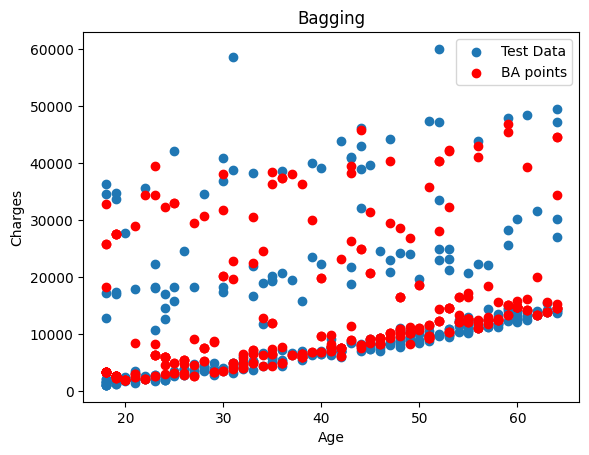

In [ ]:
plt.scatter(X_test_3['age'], y_test_3, label='Test Data')
plt.scatter(X_test_3['age'], BA_y_pred_3, color='red', linewidth=1, label='BA points')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Bagging')
plt.legend()
plt.show()

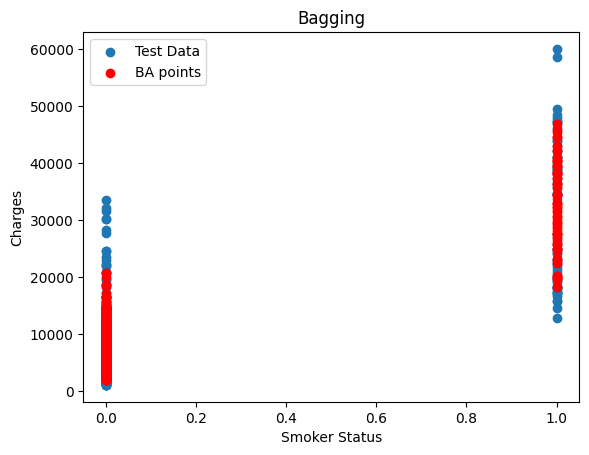

In [ ]:
plt.scatter(X_test_3['smoker_yes'], y_test_3, label='Test Data')
plt.scatter(X_test_3['smoker_yes'], BA_y_pred_3, color='red', linewidth=1, label='BA points')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.title('Bagging')
plt.legend()
plt.show()

In [ ]:
# Different splitting ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    BA_X_train_3, BA_X_test_3, BA_y_train_3, BA_y_test_3 = train_test_split(X_4, y_4, test_size=ratio, random_state=1)
    ba_model_3 = BaggingRegressor(base_model_3, n_estimators = 100, random_state = 1)
    ba_model_3.fit(BA_X_train_3, BA_y_train_3)
    Ba_y_pred_3 = ba_model_3.predict(BA_X_test_3)
    BA_rmse_3 = np.sqrt(metrics.mean_squared_error(BA_y_test_3, Ba_y_pred_3))
    BA_R2_3 = r2_score(BA_y_test_3, Ba_y_pred_3)
    print(f"Split Ratio: {ratio}, RMSE: {BA_rmse_3}, R Score: {BA_R2_3}")


Split Ratio: 0.1, RMSE: 8644.754267799073, R Score: 0.527085140895587
Split Ratio: 0.2, RMSE: 7573.421703770729, R Score: 0.6157792701523003
Split Ratio: 0.3, RMSE: 7596.401302378487, R Score: 0.5928121119526875
Split Ratio: 0.4, RMSE: 7574.177513269328, R Score: 0.6008829623932337


In [ ]:
#R Squared values:

print(f"Model 1: {(r2_score(y_test,BA_y_pred))}")
print(f"Model 2: {(r2_score(y_test_1,BA_y_pred_1))}")
print(f"Model 3: {(r2_score(y_test_2,BA_y_pred_2))}")
print(f"Model 4: {(r2_score(y_test_3,BA_y_pred_3))}")

Model 1: 0.8181018584358947
Model 2: 0.584290429626773
Model 3: 0.8216046893625825
Model 4: 0.5727497625699711


#BOOSTING ALGORITHM

In [ ]:
boost_model1 = xgb.XGBRegressor()
boost_model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

boost_train_model1 = boost_model1.fit(X_train, y_train)
boost_train_model2 = boost_model2.fit(X_train, y_train)

boost_pred1 = boost_train_model1.predict(X_test)
boost_pred2 = boost_train_model2.predict(X_test)

print(f'Model 1(1) R Score: {(r2_score(y_test, boost_pred1))}')
print(f'Model 1(2) R Score: {(r2_score(y_test, boost_pred2))}')

Model 1(1) R Score: 0.8033076042141283
Model 1(2) R Score: 0.8157395961121844


Boosting after removing Multicolinearity:

In [ ]:
boost_model1_1 = xgb.XGBRegressor()
boost_model2_1 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

boost_train_model1_1 = boost_model1_1.fit(X_train_1, y_train_1)
boost_train_model2_1 = boost_model2_1.fit(X_train_1, y_train_1)

boost_pred1_1 = boost_train_model1_1.predict(X_test_1)
boost_pred2_1 = boost_train_model2_1.predict(X_test_1)

print(f'Model 2(1) R Score: {(r2_score(y_test_1, boost_pred1_1))}')
print(f'Model 2(2) R Score: {(r2_score(y_test_1, boost_pred2_1))}')

Model 2(1) R Score: 0.4987989900266372
Model 2(2) R Score: 0.5346358344835345


Boosting after removing Insignificance:

In [ ]:
boost_model1_2 = xgb.XGBRegressor()
boost_model2_2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

boost_train_model1_2 = boost_model1_2.fit(X_train_2, y_train_2)
boost_train_model2_2 = boost_model2_2.fit(X_train_2, y_train_2)

boost_pred1_2 = boost_train_model1_2.predict(X_test_2)
boost_pred2_2 = boost_train_model2_2.predict(X_test_2)

print(f'Model 3(1) R Score: {(r2_score(y_test_2, boost_pred1_2))}')
print(f'Model 3(2) R Score: {(r2_score(y_test_2, boost_pred2_2))}')

Model 3(1) R Score: 0.7949992609992695
Model 3(2) R Score: 0.8107420860814198


Boosting after removing Multicolinearity and then Insignificance:

In [ ]:
boost_model1_3 = xgb.XGBRegressor()
boost_model2_3 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

boost_train_model1_3 = boost_model1_3.fit(X_train_3, y_train_3)
boost_train_model2_3 = boost_model2_3.fit(X_train_3, y_train_3)

boost_pred1_3 = boost_train_model1_3.predict(X_test_3)
boost_pred2_3 = boost_train_model2_3.predict(X_test_3)

print(f'Model 4(1) R Score: {(r2_score(y_test_3, boost_pred1_3))}')
print(f'Model 4(2) R Score: {(r2_score(y_test_3, boost_pred2_3))}')

Model 4(1) R Score: 0.5125069329230832
Model 4(2) R Score: 0.5494500947131551


In [ ]:
#R Scores:

print(f'Model 1(1) R Score: {(r2_score(y_test, boost_pred1))}')
print(f'Model 1(2) R Score: {(r2_score(y_test, boost_pred2))}')
print(f'Model 2(1) R Score: {(r2_score(y_test_1, boost_pred1_1))}')
print(f'Model 2(2) R Score: {(r2_score(y_test_1, boost_pred2_1))}')
print(f'Model 3(1) R Score: {(r2_score(y_test_2, boost_pred1_2))}')
print(f'Model 3(2) R Score: {(r2_score(y_test_2, boost_pred2_2))}')
print(f'Model 4(1) R Score: {(r2_score(y_test_3, boost_pred1_3))}')
print(f'Model 4(2) R Score: {(r2_score(y_test_3, boost_pred2_3))}')

Model 1(1) R Score: 0.8033076042141283
Model 1(2) R Score: 0.8157395961121844
Model 2(1) R Score: 0.4987989900266372
Model 2(2) R Score: 0.5346358344835345
Model 3(1) R Score: 0.7949992609992695
Model 3(2) R Score: 0.8107420860814198
Model 4(1) R Score: 0.5125069329230832
Model 4(2) R Score: 0.5494500947131551
